In [1]:
# 3-month item-level sales forecast for different store.
# There are 10 different stores and 50 different items in a 5-year dataset.
# Accordingly, we need to give forecasts for 3 months after the store-item breakdown.

#---------------------------------------------------------------

# Farklı store için 3 aylık item-level sales tahmini.
# 5 yıllık bir veri setinde 10 farklı mağaza ve 50 farklı item var.
# Buna göre mağaza-item kırılımında 3 ay sonrasının tahminlerini vermemiz gerekiyor.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.float_format",lambda x : "%.4f" %x)
pd.set_option("display.width",200)
#pd.set_option("display.max_rows",200)

In [4]:
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
train_path = "/Users/gokhanersoz/Desktop/VBO_Dataset/demand_forecasting/train.csv"
test_path = "/Users/gokhanersoz/Desktop/VBO_Dataset/demand_forecasting/test.csv"
sample_path = "/Users/gokhanersoz/Desktop/VBO_Dataset/demand_forecasting/sample_submission.csv"

In [6]:
########################
# Loading the data
########################

In [7]:
train = pd.read_csv(train_path,parse_dates = ["date"])
test = pd.read_csv(test_path,parse_dates=["date"])
sample_sub = pd.read_csv(sample_path)

print("Train Shape : {}".format(train.shape))
print("Test Shape : {}".format(test.shape))
print("Sample Shape : {}".format(sample_sub.shape))

Train Shape : (913000, 4)
Test Shape : (45000, 4)
Sample Shape : (45000, 2)


In [8]:
df = pd.concat([train,test],axis = 0 ,sort = False)

print("DataFrame Shape : {}".format(df.shape))

DataFrame Shape : (958000, 5)


In [9]:
#####################################################
# EDA
#####################################################

In [10]:
def check_df(dataframe, num = 5):
    
    print(" shape ".upper().center(50,"#"),end = "\n\n" )
    print(dataframe.shape,end = "\n\n")
    
    print(" types ".upper().center(50,"#"),end = "\n\n" )
    print(dataframe.dtypes,end = "\n\n")
    
    print(" head ".upper().center(50,"#"),end = "\n\n" )
    print(dataframe.head(num),end = "\n\n")
    
    print(" tail ".upper().center(50,"#"),end = "\n\n" )
    print(dataframe.tail(num),end = "\n\n")
    
    print(" quantiles ".upper().center(50,"#"),end = "\n\n" )
    print(dataframe.quantile([0,.01 ,.05, .50, .95 ,.99, 1]).T,end = "\n\n")       
                                   

In [11]:
print("For Train ;")
for col in train:
    if col  not in "date":
        print(f"{col.upper()} Nunique : {train[col].nunique()}")

print("\n")
        
print("For Test ;")
for col in test:
    if col not in "date":
        print(f"{col.upper()} Nunique : {test[col].nunique()}")

print("\n")
        
print("For Sample ;")
for col in sample_sub:
        print(f"{col.upper()} Nunique : {sample_sub[col].nunique()}")

For Train ;
STORE Nunique : 10
ITEM Nunique : 50
SALES Nunique : 213


For Test ;
ID Nunique : 45000
STORE Nunique : 10
ITEM Nunique : 50


For Sample ;
ID Nunique : 45000
SALES Nunique : 1


In [12]:
print("Train DataFrame:\nTrain Min Date : {}\nTrain Max Date : {}\n ".format(train.date.min(),train.date.max()))
print("Test DataFrame:\nTest Min Date : {}\nTest Max Date : {} ".format(test.date.min(),test.date.max()))

Train DataFrame:
Train Min Date : 2013-01-01 00:00:00
Train Max Date : 2017-12-31 00:00:00
 
Test DataFrame:
Test Min Date : 2018-01-01 00:00:00
Test Max Date : 2018-03-31 00:00:00 


In [13]:
check_df(train)

##################### SHAPE ######################

(913000, 4)

##################### TYPES ######################

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

###################### HEAD ######################

        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10

###################### TAIL ######################

             date  store  item  sales
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

################### QUANTILES ####################

       0.0000  0.0100  0.0500  0.5000   0.9500   0.9900   1.0000
store  1.0000  1.0000  1.0000  5.5000  10.0000  10.0000  10.0000
item   1.0000  1.0000  3.0000 25.5000  48.0000  50.0000  5

In [14]:
check_df(test)

##################### SHAPE ######################

(45000, 4)

##################### TYPES ######################

id                int64
date     datetime64[ns]
store             int64
item              int64
dtype: object

###################### HEAD ######################

   id       date  store  item
0   0 2018-01-01      1     1
1   1 2018-01-02      1     1
2   2 2018-01-03      1     1
3   3 2018-01-04      1     1
4   4 2018-01-05      1     1

###################### TAIL ######################

          id       date  store  item
44995  44995 2018-03-27     10    50
44996  44996 2018-03-28     10    50
44997  44997 2018-03-29     10    50
44998  44998 2018-03-30     10    50
44999  44999 2018-03-31     10    50

################### QUANTILES ####################

       0.0000   0.0100    0.0500     0.5000     0.9500     0.9900     1.0000
id     0.0000 449.9900 2249.9500 22499.5000 42749.0500 44549.0100 44999.0000
store  1.0000   1.0000    1.0000     5.5000    10.0000    1

In [15]:
check_df(sample_sub)

##################### SHAPE ######################

(45000, 2)

##################### TYPES ######################

id       int64
sales    int64
dtype: object

###################### HEAD ######################

   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52

###################### TAIL ######################

          id  sales
44995  44995     52
44996  44996     52
44997  44997     52
44998  44998     52
44999  44999     52

################### QUANTILES ####################

       0.0000   0.0100    0.0500     0.5000     0.9500     0.9900     1.0000
id     0.0000 449.9900 2249.9500 22499.5000 42749.0500 44549.0100 44999.0000
sales 52.0000  52.0000   52.0000    52.0000    52.0000    52.0000    52.0000



In [16]:
check_df(df)

##################### SHAPE ######################

(958000, 5)

##################### TYPES ######################

date     datetime64[ns]
store             int64
item              int64
sales           float64
id              float64
dtype: object

###################### HEAD ######################

        date  store  item   sales  id
0 2013-01-01      1     1 13.0000 NaN
1 2013-01-02      1     1 11.0000 NaN
2 2013-01-03      1     1 14.0000 NaN
3 2013-01-04      1     1 13.0000 NaN
4 2013-01-05      1     1 10.0000 NaN

###################### TAIL ######################

            date  store  item  sales         id
44995 2018-03-27     10    50    NaN 44995.0000
44996 2018-03-28     10    50    NaN 44996.0000
44997 2018-03-29     10    50    NaN 44997.0000
44998 2018-03-30     10    50    NaN 44998.0000
44999 2018-03-31     10    50    NaN 44999.0000

################### QUANTILES ####################

       0.0000   0.0100    0.0500     0.5000     0.9500     0.9900     1.00

In [17]:
# Sales Distribution

df[["sales"]].describe([0.10, 0.30, 0.50, 0.70, 0.80, 0.90, 0.95, 0.99]).T

count    mean     std    min     10%     30%     50%     70%     80%     90%      95%      99%      max
sales 913000.0000 52.2503 28.8011 0.0000 20.0000 33.0000 47.0000 64.0000 76.0000 93.0000 107.0000 135.0000 231.0000

In [18]:
df.groupby(["store"])["item"].nunique()

store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

In [19]:
df.groupby(["store","item"]).agg({"sales" : "sum"}).T

store         1                                                                                                                                                                              \
item          1          2          3          4          5          6          7           8          9           10          11          12          13         14          15         16   
sales 36468.0000 97050.0000 60638.0000 36440.0000 30335.0000 96889.0000 96383.0000 126856.0000 84918.0000 121163.0000 115436.0000 115465.0000 139067.0000 97050.0000 145497.0000 42605.0000   

store                                                                                                                                                                                        \
item          17          18         19         20         21          22         23          24          25         26         27          28          29         30         31         32   
sales 54729.0000 139407.0000 66972.0000 78318.0000 66058.0000 132899.0000 48334.0000 109560.0000 132816.0000 78949.0000 36613.0000 145289.0000 115196.0000 66317.0000 96793.0000 72744.0000   

store                                                                                                                                                                                                  \
item           33         34          35          36         37          38         39         40         41         42         43         44          45         46         47         48         49   
sales 114592.0000 42500.0000 108638.0000 126560.0000 48251.0000 133927.0000 72483.0000 48286.0000 36525.0000 60451.0000 84439.0000 48561.0000 132788.0000 96495.0000 36181.0000 84993.0000 48319.0000   

store                     2                                                                                                                                                                        \
item           50         1           2          3          4          5           6           7           8           9           10          11          12          13          14          15   
sales 108360.0000 51445.0000 137528.0000 85808.0000 51557.0000 42985.0000 136850.0000 137057.0000 180939.0000 119563.0000 171822.0000 163080.0000 163154.0000 197031.0000 137607.0000 205569.0000   

store                                                                                                                                                                                           \
item          16         17          18         19          20         21          22         23          24          25          26         27          28          29         30          31   
sales 60167.0000 77730.0000 197422.0000 94623.0000 111346.0000 94507.0000 188096.0000 68601.0000 154813.0000 188856.0000 111575.0000 51747.0000 205677.0000 162466.0000 94633.0000 137455.0000   

store                                                                                                                                                                                           \
item           32          33         34          35          36         37          38          39         40         41         42          43         44          45          46         47   
sales 103635.0000 163083.0000 60425.0000 154594.0000 180355.0000 68218.0000 188533.0000 102556.0000 68604.0000 51255.0000 86494.0000 120124.0000 68997.0000 188774.0000 137351.0000 51471.0000   

store                                            3                                                                                                                                                \
item           48         49          50         1           2          3          4          5           6           7           8           9           10          11          12          13   
sales 120568.0000 68862.0000 154520.0000 45778.0000 121985.0000 76274.0000 45862.0000 38086.0000 1

In [20]:
df.groupby(["store","item"]).agg({"sales" : ["sum","mean","median","std"]}).T

store                1                                                                                                                                                                              \
item                 1          2          3          4          5          6          7           8          9           10          11          12          13         14          15         16   
sales sum    36468.0000 97050.0000 60638.0000 36440.0000 30335.0000 96889.0000 96383.0000 126856.0000 84918.0000 121163.0000 115436.0000 115465.0000 139067.0000 97050.0000 145497.0000 42605.0000   
      mean      19.9715    53.1490    33.2081    19.9562    16.6128    53.0608    52.7837     69.4721    46.5049     66.3543     63.2180     63.2338     76.1594    53.1490     79.6807    23.3324   
      median    19.0000    52.0000    33.0000    20.0000    16.0000    52.0000    52.0000     68.5000    46.0000     65.0000     62.0000     62.0000     75.0000    52.0000     78.0000    23.0000   
      std        6.7410    15.0058    10.0725     6.6406     5.6721    14.8264    15.0738     18.7520    13.2475     18.2830     17.2304     17.6369     20.3749    14.7700     21.7258     7.6147   

store                                                                                                                                                                                               \
item                 17          18         19         20         21          22         23          24          25         26         27          28          29         30         31         32   
sales sum    54729.0000 139407.0000 66972.0000 78318.0000 66058.0000 132899.0000 48334.0000 109560.0000 132816.0000 78949.0000 36613.0000 145289.0000 115196.0000 66317.0000 96793.0000 72744.0000   
      mean      29.9721     76.3456    36.6769    42.8905    36.1763     72.7815    26.4699     60.0000     72.7360    43.2360    20.0509     79.5668     63.0865    36.3182    53.0082    39.8379   
      median    29.0000     75.0000    36.0000    42.0000    35.0000     72.0000    26.0000     59.0000     72.0000    43.0000    20.0000     79.0000     62.0000    36.0000    52.0000    39.0000   
      std        9.1168     21.0531    11.1006    12.1816    10.8408     19.8080     8.4607     16.6428     19.7994    12.8489     6.6403     21.4600     17.2771    10.9380    14.9540    11.4641   

store                                                                                                                                                                                              \
item                  33         34          35          36         37          38         39         40         41         42         43         44          45         46         47         48   
sales sum    114592.0000 42500.0000 108638.0000 126560.0000 48251.0000 133927.0000 72483.0000 48286.0000 36525.0000 60451.0000 84439.0000 48561.0000 132788.0000 96495.0000 36181.0000 84993.0000   
      mean       62.7558    23.2749     59.4951     69.3100    26.4244     73.3445    39.6950    26.4436    20.0027    33.1057    46.2426    26.5942     72.7207    52.8450    19.8143    46.5460   
      median     62.0000    23.0000     58.0000     68.0000    26.0000     72.0000    39.0000    26.0000    20.0000    33.0000    45.0000    26.0000     72.0000    52.0000    19.0000    45.0000   
      std        17.1781     7.4994     16.4828     19.1706     8.3127     19.9482    11.7835     8.2088     6.6849     9.6239    13.3451     8.3642     19.7303    14.9324     6.5544    13.4164   

store                                       2                                                                                                                                                \
item                 49          50         1           2          3          4          5           6           7           8           9           10          11          12          13   
sales sum    48319.0000 108360.0000 51445.0000 137528.000

In [21]:
def store_sales(dataframe):
    
    plt.figure(figsize = (20,12))
    for i in range(1,11):
    
        plt.subplot(2,5,i)
        dataframe[dataframe["store"] == i]["sales"].hist()
        plt.title(f"For Store {i}",fontsize = 15)
        plt.tight_layout()        

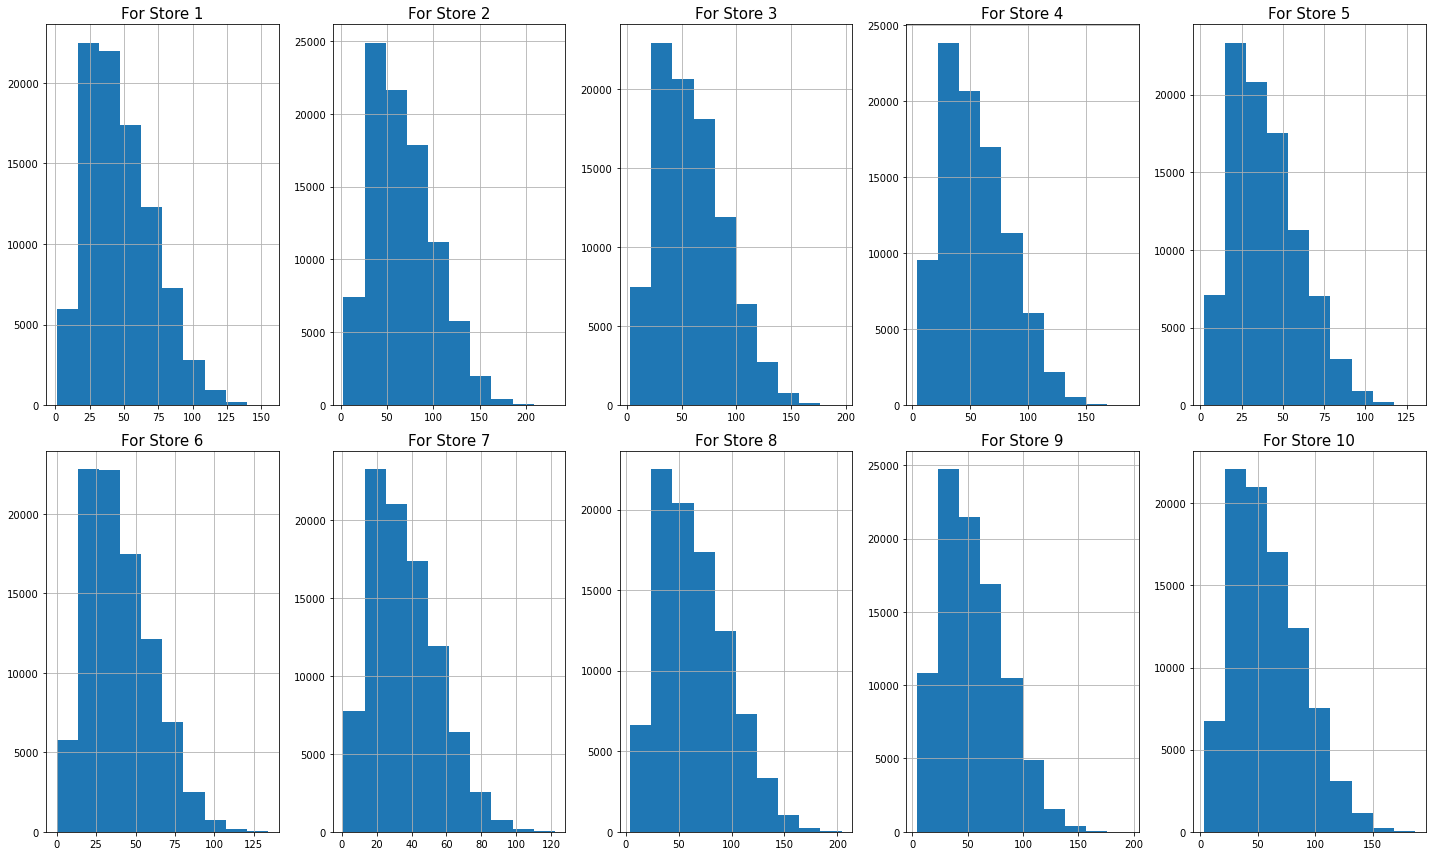

In [22]:
store_sales(train)

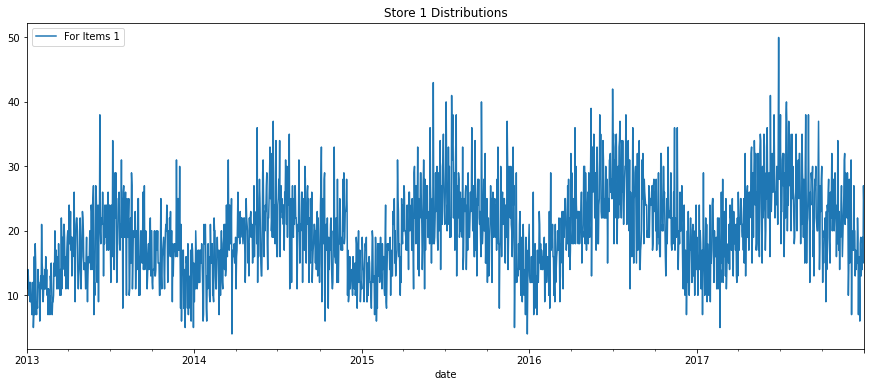

In [23]:
# I want to do

plt.figure(figsize = (15,6))
example = train[train["store"] == 1].set_index("date")
example[example["item"] == 1]["sales"].plot(label = "For Items 1")
plt.legend(loc = "upper left")
plt.title("Store 1 Distributions")
plt.show()

In [24]:
def store_item_sales(dataframe,store = 1):
    
    plt.figure(figsize = (50,50))
    store_groupby = train[train["store"] == store].set_index("date")
    
    for item in range(1,51):
            
            plt.subplot(10,5,item)
            store_groupby[store_groupby["item"] == item]["sales"].plot(label = f"Item {item} Sales")
            plt.legend(loc = "upper left")
    
    plt.tight_layout(pad = 4.5)
    plt.suptitle(f"For Store {store} Item Sales Distribution",y = 1.01 ,x=0.5,fontsize = 16)
    plt.show()

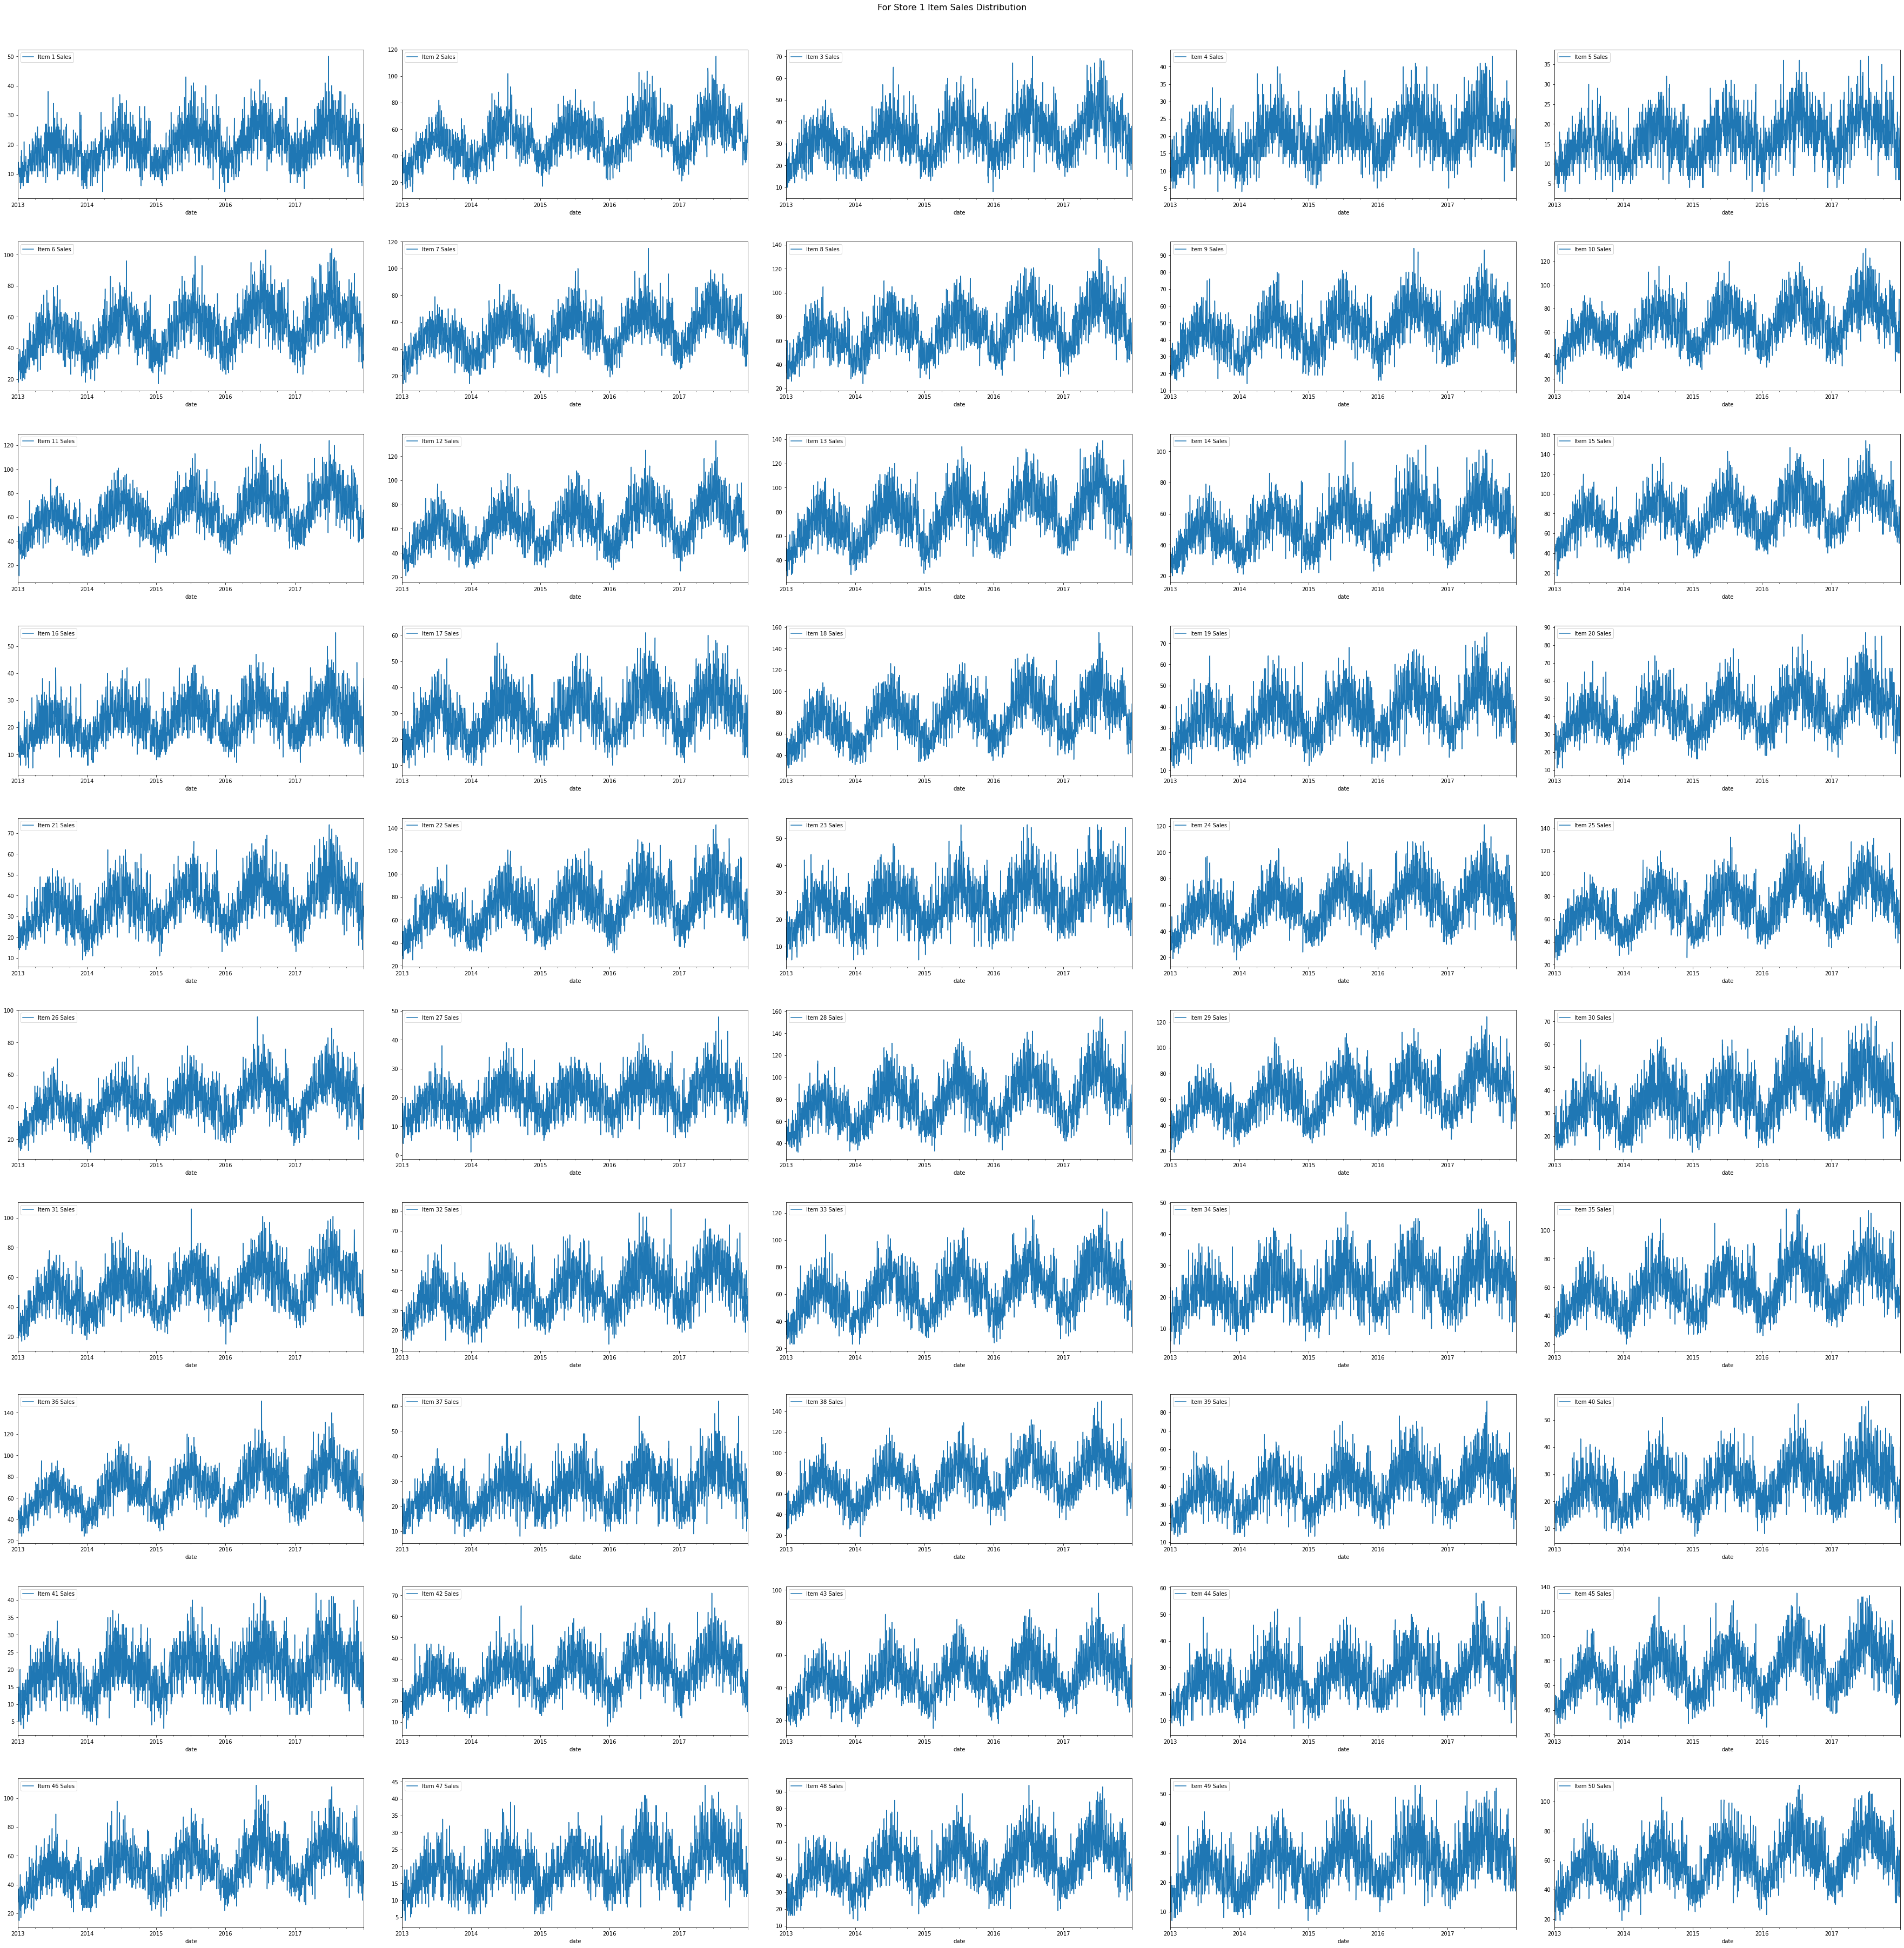

In [25]:
store_item_sales(train,store = 1)

In [26]:
#####################################################
# FEATURE ENGINEERING
#####################################################

In [27]:
from scipy.stats import shapiro,levene,mannwhitneyu,ttest_ind

def ab_test(GroupA,GroupB):
    
    #print("""

    #Normality Test

    # H0: Normal dağılım varsayımı sağlanmaktadır.
    # H1:..sağlanmamaktadır.
    
    #Homogeneity
    
    # H0: Varyanslar Homojendir
    # H1: Varyanslar Homojen Değildir
        

    # 1. Varsayımlar sağlanıyorsa bağımsız iki örneklem t testi (parametrik test)
    # 2. Varsayımlar sağlanmıyorsa mannwhitneyu testi (non-parametrik test)

    # Eğer normallik sağlanmazsa her türlü nonparametrik test yapacağız.
    # Eger normallik sağlanır varyans homojenliği sağlanmazsa ne olacak?
    # T test fonksiyonuna arguman gireceğiz.

    # H0: M1 = M2 (... iki grup ortalamaları arasında ist ol.anl.fark yoktur.)
    # H1: M1 != M2 (...vardır)
    
    #-----------------------------------------------------------
    
    #Normality Test

     # H0: Assumption of normal distribution is provided.
     # H1:..not provided.
    
     #homogeneity
    
     # H0: Variances are Homogeneous
     # H1: Variances Are Not Homogeneous
        

     #1. Independent two-sample t-test (parametric test) if assumptions are met
     # 2. Mannwhitneyu test if assumptions are not provided (non-parametric test)

     # If normality is not achieved, we will do all kinds of nonparametric tests.
     # What will happen if normality is achieved and variance homogeneity is not achieved?
     # We will enter arguments to the t test function.

     # H0: M1 = M2 (... there is no significant difference between the mean of the two groups.)
     # H1: M1 != M2 (...is)
    
    #""")
    
    
    testA = shapiro(GroupA)[1] < 0.05
    testB = shapiro(GroupB)[1] < 0.05
    
    if (testA == False) & (testB == False):
        
        leveneTest = levene(GroupA, GroupB)[1] < 0.05
        
        if leveneTest == False:
            
            ttest = ttest_ind(GroupA, GroupB, equal_var=True)[1]
            
        else:
            
            ttest = ttest_ind(GroupA, GroupB, equal_var=False)[1]
            
    else:
        
        ttest = mannwhitneyu(GroupA, GroupB)[1]
        
    results = pd.DataFrame({"Compare_Two_Groups" : [ttest < 0.05],
                            "p-value" : [round(ttest,5)],  
                            "GroupA_Mean"   : [GroupA.mean()]   ,"GroupB_Mean"   : [GroupB.mean()],
                            "GroupA_Median" : [GroupA.median()] ,"GroupB_Median" : [GroupB.median()],
                            "GroupA_Count"  : [GroupA.count()]  ,"GroupB_Count"  : [GroupB.count()]
                           })
    
    # H0 < 0.05 ise zaten True olur ve gruplar arasında istatiksel olarak fark vardır !!!! Red ediyor...
    # Değil ise zaten bunlar eşittir...
    # Kafanı boşa yordun zaten biliyorsun bunu neden yordun ki....
    
    # If H0 < 0.05 it is already True and there is a statistical difference between groups !!!! He refuses...
    # If not, they are already equal...
    # You're wasting your mind, you already know, why did you get tired of this....
    
    results["Compare_Two_Groups"] = np.where(results["Compare_Two_Groups"] ==True,"Different_Groups",
                                                                                  "Similar_Groups")
    
    results["TestType"] = np.where( (testA == False) & (testB == False) , "Parametric", "Non-Parametric")
    
    return results

In [28]:
# Her mağazada 50 tane item var 1 store da 50 tane item var ve onların toplamını alıyoruz....
# There are 50 items in each store. There are 50 items in 1 store and we take their sum....

import itertools

store_sales = df.groupby(["date","store"])["sales"].sum().reset_index().set_index("date")

combination_stores = list(itertools.combinations( df["store"].unique(), 2))

AB_Stores = pd.DataFrame()

for i,j in combination_stores:
    
    GroupA = store_sales[store_sales["store"] == i]["sales"]
    GroupB = store_sales[store_sales["store"] == j]["sales"]
    
    data = ab_test(GroupA,GroupB)
    data.index = [(i,j)]
    
    data = data[["TestType","Compare_Two_Groups","p-value","GroupA_Mean","GroupB_Mean",
                 "GroupA_Median","GroupB_Median","GroupA_Count","GroupB_Count",]]
    
    AB_Stores = pd.concat([AB_Stores,data])

In [29]:
test_1 = df[df["date"] == "2013-01-01"][["store","sales","item","date"]].set_index("date")
test_1[test_1["store"] == 1].sum()

store     50.0000
sales   1316.0000
item    1275.0000
dtype: float64

In [30]:
store_sales.T

date   2013-01-01  2013-01-01  2013-01-01  2013-01-01  2013-01-01  2013-01-01  2013-01-01  2013-01-01  2013-01-01  2013-01-01  2013-01-02  2013-01-02  2013-01-02  2013-01-02  2013-01-02  2013-01-02  \
store      1.0000      2.0000      3.0000      4.0000      5.0000      6.0000      7.0000      8.0000      9.0000     10.0000      1.0000      2.0000      3.0000      4.0000      5.0000      6.0000   
sales   1316.0000   1742.0000   1588.0000   1423.0000   1032.0000   1099.0000    964.0000   1628.0000   1383.0000   1521.0000   1264.0000   1808.0000   1538.0000   1432.0000    997.0000   1023.0000   

date   2013-01-02  2013-01-02  2013-01-02  2013-01-02  2013-01-03  2013-01-03  2013-01-03  2013-01-03  2013-01-03  2013-01-03  2013-01-03  2013-01-03  2013-01-03  2013-01-03  2013-01-04  2013-01-04  \
store      7.0000      8.0000      9.0000     10.0000      1.0000      2.0000      3.0000      4.0000      5.0000      6.0000      7.0000      8.0000      9.0000     10.0000      1.0000      2.0000   
sales    944.0000   1687.0000   1455.0000   1530.0000   1305.0000   1887.0000   1635.0000   1534.0000   1130.0000   1149.0000    966.0000   1736.0000   1492.0000   1654.0000   1452.0000   1983.0000   

date   2013-01-04  2013-01-04  2013-01-04  2013-01-04  2013-01-04  2013-01-04  2013-01-04  2013-01-04  2013-01-05  2013-01-05  2013-01-05  2013-01-05  2013-01-05  2013-01-05  2013-01-05  2013-01-05  \
store      3.0000      4.0000      5.0000      6.0000      7.0000      8.0000      9.0000     10.0000      1.0000      2.0000      3.0000      4.0000      5.0000      6.0000      7.0000      8.0000   
sales   1741.0000   1685.0000   1258.0000   1201.0000   1040.0000   1966.0000   1612.0000   1739.0000   1499.0000   2087.0000   1887.0000   1649.0000   1154.0000   1286.0000   1131.0000   2005.0000   

date   2013-01-05  2013-01-05  2013-01-06  2013-01-06  2013-01-06  2013-01-06  2013-01-06  2013-01-06  2013-01-06  2013-01-06  2013-01-06  2013-01-06  2013-01-07  2013-01-07  2013-01-07  2013-01-07  \
store      9.0000     10.0000      1.0000      2.0000      3.0000      4.0000      5.0000      6.0000      7.0000      8.0000      9.0000     10.0000      1.0000      2.0000      3.0000      4.0000   
sales   1698.0000   1841.0000   1613.0000   2206.0000   1956.0000   1927.0000   1265.0000   1359.0000   1193.0000   2085.0000   1781.0000   1906.0000   1012.0000   1496.0000   1313.0000   1268.0000   

date   2013-01-07  2013-01-07  2013-01-07  2013-01-07  2013-01-07  2013-01-07  2013-01-08  2013-01-08  2013-01-08  2013-01-08  2013-01-08  2013-01-08  2013-01-08  2013-01-08  2013-01-08  2013-01-08  \
store      5.0000      6.0000      7.0000      8.0000      9.0000     10.0000      1.0000      2.0000      3.0000      4.0000      5.0000      6.0000      7.0000      8.0000      9.0000     10.0000   
sales    868.0000    908.0000    790.0000   1577.0000   1212.0000   1325.0000   1228.0000   1800.0000   1538.0000   1431.0000    992.0000   1002.0000    932.0000   1665.0000   1444.0000   1528.0000   

date   2013-01-09  2013-01-09  2013-01-09  2013-01-09  2013-01-09  2013-01-09  2013-01-09  2013-01-09  2013-01-09  2013-01-09  2013-01-10  2013-01-10  2013-01-10  2013-01-10  2013-01-10  2013-01-10  \
store      1.0000      2.0000      3.0000      4.0000      5.0000      6.0000      7.0000      8.0000      9.0000     10.0000      1.0000      2.0000      3.0000      4.0000      5.0000      6.0000   
sales   1243.0000   1786.0000   1633.0000   1471.0000   1045.0000   1025.0000    979.0000   1689.0000   1401.0000   1606.0000   1339.0000   1956.0000   1677.0000   1475.0000   1166.0000   1177.0000   

date   2013-01-10  2013-01-10  2013-01-10  2013-01-10  2013-01-11  2013-01-11  2013-01-11  2013-01-11  2013-01-11  2013-01-11  2013-01-11  2013-01-11  2013-01-11  2013-01-11  2013-01-12  2013-01-12  \
store      7.0000      8.0000      9.0000     10.0000      1.0000      2.0000      3.0000      4.0000      5.0000      6.0000      7.0000      8.0000      9.0000     10.0000  

In [31]:
AB_Stores

TestType Compare_Two_Groups  p-value  GroupA_Mean  GroupB_Mean  GroupA_Median  GroupB_Median  GroupA_Count  GroupB_Count
(1, 2)   Non-Parametric   Different_Groups   0.0000    2252.4024    3194.2213      2297.0000      3268.5000          1916          1916
(1, 3)   Non-Parametric   Different_Groups   0.0000    2252.4024    2836.7140      2297.0000      2897.5000          1916          1916
(1, 4)   Non-Parametric   Different_Groups   0.0000    2252.4024    2616.1999      2297.0000      2667.0000          1916          1916
(1, 5)   Non-Parametric   Different_Groups   0.0000    2252.4024    1895.1023      2297.0000      1940.0000          1916          1916
(1, 6)   Non-Parametric   Different_Groups   0.0000    2252.4024    1893.3559      2297.0000      1937.0000          1916          1916
(1, 7)   Non-Parametric   Different_Groups   0.0000    2252.4024    1732.7813      2297.0000      1767.0000          1916          1916
(1, 8)   Non-Parametric   Different_Groups   0.0000    2252.4024    3056.4556      2297.0000      3127.0000          1916          1916
(1, 9)   Non-Parametric   Different_Groups   0.0000    2252.4024    2623.1608      2297.0000      2675.0000          1916          1916
(1, 10)  Non-Parametric   Different_Groups   0.0000    2252.4024    2797.5772      2297.0000      2854.0000          1916          1916
(2, 3)   Non-Parametric   Different_Groups   0.0000    3194.2213    2836.7140      3268.5000      2897.5000          1916          1916
(2, 4)   Non-Parametric   Different_Groups   0.0000    3194.2213    2616.1999      3268.5000      2667.0000          1916          1916
(2, 5)   Non-Parametric   Different_Groups   0.0000    3194.2213    1895.1023      3268.5000      1940.0000          1916          1916
(2, 6)   Non-Parametric   Different_Groups   0.0000    3194.2213    1893.3559      3268.5000      1937.0000          1916          1916
(2, 7)   Non-Parametric   Different_Groups   0.0000    3194.2213    1732.7813      3268.5000      1767.0000          1916          1916
(2, 8)   Non-Parametric   Different_Groups   0.0000    3194.2213    3056.4556      3268.5000      3127.0000          1916          1916
(2, 9)   Non-Parametric   Different_Groups   0.0000    3194.2213    2623.1608      3268.5000      2675.0000          1916          1916
(2, 10)  Non-Parametric   Different_Groups   0.0000    3194.2213    2797.5772      3268.5000      2854.0000          1916          1916
(3, 4)   Non-Parametric   Different_Groups   0.0000    2836.7140    2616.1999      2897.5000      2667.0000          1916          1916
(3, 5)   Non-Parametric   Different_Groups   0.0000    2836.7140    1895.1023      2897.5000      1940.0000          1916          1916
(3, 6)   Non-Parametric   Different_Groups   0.0000    2836.7140    1893.3559      2897.5000      1937.0000          1916          1916
(3, 7)   Non-Parametric   Different_Groups   0.0000    2836.7140    1732.7813      2897.5000      1767.0000          1916          1916
(3, 8)   Non-Parametric   Different_Groups   0.0000    2836.7140    3056.4556      2897.5000      3127.0000          1916          1916
(3, 9)   Non-Parametric   Different_Groups   0.0000    2836.7140    2623.1608      2897.5000      2675.0000          1916          1916
(3, 10)  Non-Parametric     Similar_Groups   0.0666    2836.7140    2797.5772      2897.5000      2854.0000          1916          1916
(4, 5)   Non-Parametric   Different_Groups   0.0000    2616.1999    1895.1023      2667.0000      1940.0000          1916          1916
(4, 6)   Non-Parametric   Different_Groups   0.0000    2616.1999    1893.3559      2667.0000      1937.0000          1916          1916
(4, 7)   Non-Parametric   Different_Groups   0.0000    2616.1999    1732.7813      2667.0000      1767.0000          1916          1916
(4, 8)   Non-Parametric   Different_Groups   0.0000    2616.1999    3056.4556      2667.0000      3127.0000          1916          1916
(4, 9)   Non-Parametric     Similar_Groups   0.3907    2616.1999    262

In [32]:
AB_Stores[AB_Stores["Compare_Two_Groups"] == "Similar_Groups"]

TestType Compare_Two_Groups  p-value  GroupA_Mean  GroupB_Mean  GroupA_Median  GroupB_Median  GroupA_Count  GroupB_Count
(3, 10)  Non-Parametric     Similar_Groups   0.0666    2836.7140    2797.5772      2897.5000      2854.0000          1916          1916
(4, 9)   Non-Parametric     Similar_Groups   0.3907    2616.1999    2623.1608      2667.0000      2675.0000          1916          1916
(5, 6)   Non-Parametric     Similar_Groups   0.4553    1895.1023    1893.3559      1940.0000      1937.0000          1916          1916

In [33]:
similar_stores = AB_Stores[AB_Stores["Compare_Two_Groups"] == "Similar_Groups"].index.tolist()
similar_stores

[(3, 10), (4, 9), (5, 6)]

---

In [34]:
item_sales = df.groupby(["date","item"])["sales"].sum().reset_index().set_index("date")

combination_items = list(itertools.combinations(item_sales["item"].unique(), 2))

AB_items = pd.DataFrame()

for i , j in combination_items:
    
    GroupA = item_sales[item_sales["item"] == i]["sales"]
    GroupB = item_sales[item_sales["item"] == j]["sales"]
    
    data = ab_test(GroupA,GroupB)
    data.index = [(i,j)]
    
    data = data[["TestType","Compare_Two_Groups","p-value","GroupA_Mean","GroupB_Mean",
                 "GroupA_Median","GroupB_Median","GroupA_Count","GroupB_Count"]]
    
    AB_items = pd.concat([AB_items,data],axis = 0)

In [35]:
test_2 = df[df["date"] == "2013-01-01"][["item","sales","date"]].set_index("date")
test_2[test_2["item"] == 1][["sales"]].sum()

sales   133.0000
dtype: float64

In [36]:
item_sales.head()

item    sales
date                     
2013-01-01     1 133.0000
2013-01-01     2 327.0000
2013-01-01     3 172.0000
2013-01-01     4 102.0000
2013-01-01     5  83.0000

In [37]:
AB_items

TestType Compare_Two_Groups  p-value  GroupA_Mean  GroupB_Mean  GroupA_Median  GroupB_Median  GroupA_Count  GroupB_Count
(1, 2)    Non-Parametric   Different_Groups   0.0000     209.4906     558.2276       214.0000       569.0000          1916          1916
(1, 3)    Non-Parametric   Different_Groups   0.0000     209.4906     349.2103       214.0000       355.5000          1916          1916
(1, 4)    Non-Parametric     Similar_Groups   0.4266     209.4906     209.7636       214.0000       214.0000          1916          1916
(1, 5)    Non-Parametric   Different_Groups   0.0000     209.4906     174.9635       214.0000       178.0000          1916          1916
(1, 6)    Non-Parametric   Different_Groups   0.0000     209.4906     557.5579       214.0000       568.5000          1916          1916
...                  ...                ...      ...          ...          ...            ...            ...           ...           ...
(47, 49)  Non-Parametric   Different_Groups   0.0000     209.6978     279.5736       214.5000       284.0000          1916          1916
(47, 50)  Non-Parametric   Different_Groups   0.0000     209.6978     627.8753       214.5000       644.0000          1916          1916
(48, 49)  Non-Parametric   Different_Groups   0.0000     489.4066     279.5736       499.0000       284.0000          1916          1916
(48, 50)  Non-Parametric   Different_Groups   0.0000     489.4066     627.8753       499.0000       644.0000          1916          1916
(49, 50)  Non-Parametric   Different_Groups   0.0000     279.5736     627.8753       284.0000       644.0000          1916          1916

[1225 rows x 9 columns]

In [38]:
AB_items[AB_items["Compare_Two_Groups"] == "Similar_Groups"]

TestType Compare_Two_Groups  p-value  GroupA_Mean  GroupB_Mean  GroupA_Median  GroupB_Median  GroupA_Count  GroupB_Count
(1, 4)    Non-Parametric     Similar_Groups   0.4266     209.4906     209.7636       214.0000       214.0000          1916          1916
(1, 27)   Non-Parametric     Similar_Groups   0.3817     209.4906     210.1399       214.0000       215.0000          1916          1916
(1, 41)   Non-Parametric     Similar_Groups   0.4821     209.4906     209.6863       214.0000       215.0000          1916          1916
(1, 47)   Non-Parametric     Similar_Groups   0.4749     209.4906     209.6978       214.0000       214.5000          1916          1916
(2, 6)    Non-Parametric     Similar_Groups   0.4532     558.2276     557.5579       569.0000       568.5000          1916          1916
...                  ...                ...      ...          ...          ...            ...            ...           ...           ...
(40, 44)  Non-Parametric     Similar_Groups   0.2601     278.7547     280.1728       284.0000       286.0000          1916          1916
(40, 49)  Non-Parametric     Similar_Groups   0.3926     278.7547     279.5736       284.0000       284.0000          1916          1916
(41, 47)  Non-Parametric     Similar_Groups   0.4971     209.6863     209.6978       215.0000       214.5000          1916          1916
(43, 48)  Non-Parametric     Similar_Groups   0.4546     488.8492     489.4066       500.0000       499.0000          1916          1916
(44, 49)  Non-Parametric     Similar_Groups   0.3604     280.1728     279.5736       286.0000       284.0000          1916          1916

[63 rows x 9 columns]

In [39]:
similar_items = AB_items[AB_items["Compare_Two_Groups"] == "Similar_Groups"].index.tolist()
similar_items[:10]

[(1, 4),
 (1, 27),
 (1, 41),
 (1, 47),
 (2, 6),
 (2, 7),
 (2, 14),
 (2, 31),
 (2, 46),
 (3, 42)]

In [40]:
df.head()

date  store  item   sales  id
0 2013-01-01      1     1 13.0000 NaN
1 2013-01-02      1     1 11.0000 NaN
2 2013-01-03      1     1 14.0000 NaN
3 2013-01-04      1     1 13.0000 NaN
4 2013-01-05      1     1 10.0000 NaN

In [41]:
for i in range(7):
    print(f"{i} : {i//4}")

0 : 0
1 : 0
2 : 0
3 : 0
4 : 1
5 : 1
6 : 1


In [42]:
def create_date_features(dataframe):
    
    dataframe["day"]   = dataframe.date.dt.day
    dataframe["month"] = dataframe.date.dt.month
    dataframe["year"]  = dataframe.date.dt.year
    
    dataframe["day_of_week"]  = dataframe.date.dt.day_of_week
    dataframe["day_of_year"]  = dataframe.date.dt.day_of_year
    dataframe["week_of_year"] = dataframe.date.dt.weekofyear
    
    dataframe["day_name"]   = dataframe.date.dt.day_name()
    dataframe["month_name"] = dataframe.date.dt.month_name()
    
    # Friday Contains !!!
    dataframe["is_wknd"] = dataframe.date.dt.weekday // 4
    
        
    # We need to convert int because results return bools
    
    dataframe["is_month_start"] = dataframe.date.dt.is_month_start.astype(int)
    dataframe["is_month_end"]   = dataframe.date.dt.is_month_end.astype(int)
    
    dataframe["is_year_start"]  = dataframe.date.dt.is_year_start.astype(int)
    dataframe["is_year_end"]    = dataframe.date.dt.is_year_end.astype(int)
    
    dataframe["is_quarter_start"] = dataframe.date.dt.is_quarter_start.astype(int)
    dataframe["is_quarter_end"]   = dataframe.date.dt.is_quarter_end.astype(int)
    
    
    #  How much is this month 
    dataframe["days_in_month"] = dataframe.date.dt.days_in_month
    
    # Winter : 0
    # Spring : 1
    # Summer : 2
    # Fail : 3
    
    # just list !!!!
    
    dataframe["season"] = np.where(dataframe.month.isin([12,1,2]),  0, np.nan)
    dataframe["season"] = np.where(dataframe.month.isin([3,4,5]),   1, dataframe["season"])
    dataframe["season"] = np.where(dataframe.month.isin([6,7,8]),   2, dataframe["season"])
    dataframe["season"] = np.where(dataframe.month.isin([9,10,11]), 3, dataframe["season"])
    
    #*******
    
    # Stores Sales Similar
    
    dataframe["StoreSalesSimilar"] = np.where(dataframe.store.isin([3,10])  ,1, 0)
    dataframe["StoreSalesSimilar"] = np.where(dataframe.store.isin([4,9] )  ,1, 0)
    dataframe["StoreSalesSimilar"] = np.where(dataframe.store.isin([5,6] )  ,1, 0)
    
    # Items Sales Similar
    
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([1,4,27,41,47])  , 1, 0)
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([2,6,7,14,31,46]), 2, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([3,42])          , 3, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([8,36])          , 4, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([9,43,48])       , 5, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([11,12,29,33])   , 6, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([13,18])         , 7, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([15,28])         , 8, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([16,34])         , 9, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([19,21,30])      , 10, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([20,26])         , 11, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([22,25,38,45])   , 12, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([23,37,40,44,49]), 13, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([24,35,50])      , 14, dataframe["ItemSalesSimilar"])
    dataframe["ItemSalesSimilar"] = np.where(dataframe.item.isin([32,39])         , 15, dataframe["ItemSalesSimilar"])


    import holidays
    
    holidays_date = holidays.USA(years = [2013,2014,2015,2016,2017,2018]).keys()
    
    dataframe["holidays"] = dataframe.date.isin(holidays_date).astype(int)
        
    return dataframe

In [43]:
df = create_date_features(df)

In [44]:
df.isnull().sum()

date                      0
store                     0
item                      0
sales                 45000
id                   913000
day                       0
month                     0
year                      0
day_of_week               0
day_of_year               0
week_of_year              0
day_name                  0
month_name                0
is_wknd                   0
is_month_start            0
is_month_end              0
is_year_start             0
is_year_end               0
is_quarter_start          0
is_quarter_end            0
days_in_month             0
season                    0
StoreSalesSimilar         0
ItemSalesSimilar          0
holidays                  0
dtype: int64

In [45]:
df.head()

date  store  item   sales  id  day  month  year  day_of_week  day_of_year  week_of_year   day_name month_name  is_wknd  is_month_start  is_month_end  is_year_start  is_year_end  \
0 2013-01-01      1     1 13.0000 NaN    1      1  2013            1            1             1    Tuesday    January        0               1             0              1            0   
1 2013-01-02      1     1 11.0000 NaN    2      1  2013            2            2             1  Wednesday    January        0               0             0              0            0   
2 2013-01-03      1     1 14.0000 NaN    3      1  2013            3            3             1   Thursday    January        0               0             0              0            0   
3 2013-01-04      1     1 13.0000 NaN    4      1  2013            4            4             1     Friday    January        1               0             0              0            0   
4 2013-01-05      1     1 10.0000 NaN    5      1  2013            5            5             1   Saturday    January        1               0             0              0            0   

   is_quarter_start  is_quarter_end  days_in_month  season  StoreSalesSimilar  ItemSalesSimilar  holidays  
0                 1               0             31  0.0000                  0                 1         1  
1                 0               0             31  0.0000                  0                 1         0  
2                 0               0             31  0.0000                  0                 1         0  
3                 0               0             31  0.0000                  0                 1         0  
4                 0               0             31  0.0000                  0                 1         0

In [46]:
df.groupby(["store","item","month"]).agg({"sales":["sum","mean","median","std"]})

sales                        
                        sum    mean  median     std
store item month                                   
1     1    1      2125.0000 13.7097 13.0000  4.3974
           2      2063.0000 14.6312 14.0000  4.6681
           3      2728.0000 17.6000 17.0000  4.5450
           4      3118.0000 20.7867 20.0000  4.8943
           5      3448.0000 22.2452 22.0000  6.5647
...                     ...     ...     ...     ...
10    50   8     13108.0000 84.5677 85.0000 15.6765
           9     11831.0000 78.8733 79.0000 15.2074
           10    11322.0000 73.0452 72.0000 14.2092
           11    11549.0000 76.9933 77.0000 16.2537
           12     8724.0000 56.2839 56.0000 11.7825

[6000 rows x 4 columns]

In [47]:
########################
# Random Noise
########################

In [48]:
def random_noise(dataframe):
    return np.random.normal(scale = 1.6, size = (len(dataframe),))

In [49]:
########################
# Lag/Shifted Features
########################

In [50]:
df.head()

date  store  item   sales  id  day  month  year  day_of_week  day_of_year  week_of_year   day_name month_name  is_wknd  is_month_start  is_month_end  is_year_start  is_year_end  \
0 2013-01-01      1     1 13.0000 NaN    1      1  2013            1            1             1    Tuesday    January        0               1             0              1            0   
1 2013-01-02      1     1 11.0000 NaN    2      1  2013            2            2             1  Wednesday    January        0               0             0              0            0   
2 2013-01-03      1     1 14.0000 NaN    3      1  2013            3            3             1   Thursday    January        0               0             0              0            0   
3 2013-01-04      1     1 13.0000 NaN    4      1  2013            4            4             1     Friday    January        1               0             0              0            0   
4 2013-01-05      1     1 10.0000 NaN    5      1  2013            5            5             1   Saturday    January        1               0             0              0            0   

   is_quarter_start  is_quarter_end  days_in_month  season  StoreSalesSimilar  ItemSalesSimilar  holidays  
0                 1               0             31  0.0000                  0                 1         1  
1                 0               0             31  0.0000                  0                 1         0  
2                 0               0             31  0.0000                  0                 1         0  
3                 0               0             31  0.0000                  0                 1         0  
4                 0               0             31  0.0000                  0                 1         0

In [51]:
df = df.sort_values(by = ["store","item","date"] ,axis = 0)
df.head()

date  store  item   sales  id  day  month  year  day_of_week  day_of_year  week_of_year   day_name month_name  is_wknd  is_month_start  is_month_end  is_year_start  is_year_end  \
0 2013-01-01      1     1 13.0000 NaN    1      1  2013            1            1             1    Tuesday    January        0               1             0              1            0   
1 2013-01-02      1     1 11.0000 NaN    2      1  2013            2            2             1  Wednesday    January        0               0             0              0            0   
2 2013-01-03      1     1 14.0000 NaN    3      1  2013            3            3             1   Thursday    January        0               0             0              0            0   
3 2013-01-04      1     1 13.0000 NaN    4      1  2013            4            4             1     Friday    January        1               0             0              0            0   
4 2013-01-05      1     1 10.0000 NaN    5      1  2013            5            5             1   Saturday    January        1               0             0              0            0   

   is_quarter_start  is_quarter_end  days_in_month  season  StoreSalesSimilar  ItemSalesSimilar  holidays  
0                 1               0             31  0.0000                  0                 1         1  
1                 0               0             31  0.0000                  0                 1         0  
2                 0               0             31  0.0000                  0                 1         0  
3                 0               0             31  0.0000                  0                 1         0  
4                 0               0             31  0.0000                  0                 1         0

In [52]:
pd.DataFrame({"sales" : df["sales"].values[:10],
              "lag1"  : df["sales"].shift(1).values[:10],
              "lag2"  : df["sales"].shift(2).values[:10],
              "lag3"  : df["sales"].shift(3).values[:10],
              "lag4"  : df["sales"].shift(4).values[:10]} )

sales    lag1    lag2    lag3    lag4
0 13.0000     NaN     NaN     NaN     NaN
1 11.0000 13.0000     NaN     NaN     NaN
2 14.0000 11.0000 13.0000     NaN     NaN
3 13.0000 14.0000 11.0000 13.0000     NaN
4 10.0000 13.0000 14.0000 11.0000 13.0000
5 12.0000 10.0000 13.0000 14.0000 11.0000
6 10.0000 12.0000 10.0000 13.0000 14.0000
7  9.0000 10.0000 12.0000 10.0000 13.0000
8 12.0000  9.0000 10.0000 12.0000 10.0000
9  9.0000 12.0000  9.0000 10.0000 12.0000

In [53]:
df.groupby(["store","item"])["sales"].head()

0        13.0000
1        11.0000
2        14.0000
3        13.0000
4        10.0000
           ...  
911174   33.0000
911175   37.0000
911176   46.0000
911177   51.0000
911178   41.0000
Name: sales, Length: 2500, dtype: float64

In [54]:
df.groupby(["store","item"])["sales"].transform(lambda x : x.shift(1))

0           NaN
1       13.0000
2       11.0000
3       14.0000
4       13.0000
          ...  
44995       NaN
44996       NaN
44997       NaN
44998       NaN
44999       NaN
Name: sales, Length: 958000, dtype: float64

In [55]:
exp = df.loc[912991: ,].groupby(["store","item"])[["sales"]].head(15)
exp["shift_sales"] = df.loc[912991:,].groupby(["store","item"])[["sales"]].shift(5).head(15)
exp

sales  shift_sales
912991 70.0000          NaN
912992 76.0000          NaN
912993 51.0000          NaN
912994 41.0000          NaN
912995 63.0000          NaN
912996 59.0000      70.0000
912997 74.0000      76.0000
912998 62.0000      51.0000
912999 82.0000      41.0000
44910      NaN      63.0000
44911      NaN      59.0000
44912      NaN      74.0000
44913      NaN      62.0000
44914      NaN      82.0000
44915      NaN          NaN

In [56]:
def lag_features(dataframe, lags):
    
    for lag in lags:
        
        dataframe["sales_lag_"+str(lag)] = dataframe.groupby(["store","item"])["sales"].transform( \
                                           lambda x : x.shift(lag)) + random_noise(dataframe)
        
    return dataframe

In [57]:
# Test verisinde +90 gün tahmin edilmesi isteniyor bu yüzden
# Lag featureları en az 91 olmalı!

# It is requested to estimate +90 days in the test data so
# Lag features must be at least 91!

df = lag_features(df , [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

In [58]:
df.loc[:,df.columns.str.contains("sales_lag_")]

sales_lag_91  sales_lag_98  sales_lag_105  sales_lag_112  sales_lag_119  sales_lag_126  sales_lag_182  sales_lag_364  sales_lag_546  sales_lag_728
0               NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN
1               NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN
2               NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN
3               NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN
4               NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN
...             ...           ...            ...            ...            ...            ...            ...            ...            ...            ...
44995       42.1045       53.2373        67.8861        68.3375        65.8811        82.3495        78.6406        59.5242        96.7454        70.3976
44996       62.4345       47.8230        67.0370        58.1618        76.5814        82.5637        81.2440        73.6191        80.0741        70.0226
44997       61.5955       62.9684        72.3271        67.5883        71.7364        86.0061        79.3009        69.1916        98.1792        75.1199
44998       73.0006       73.0688        73.6044        68.0052        67.1172        82.0134        85.5424        69.1714        77.9382        81.6798
44999       62.3149       70.8392        53.0249        69.3469        48.9171        73.9956       105.5520        97.9998        97.4700        82.2918

[958000 rows x 10 columns]

In [59]:
########################
# Rolling Mean Features
########################

In [60]:
df.sales.values[:10]

array([13., 11., 14., 13., 10., 12., 10.,  9., 12.,  9.])

In [61]:
# Shift Olunca Kendisi Dahil değil !!!
# Ama Normalde Kendisi Dahil !!!

# It Is Not Included With Shift !!!
# But Normally Himself Included!!!

df.sales.rolling(window = 2).mean().values[:10]

array([ nan, 12. , 12.5, 13.5, 11.5, 11. , 11. ,  9.5, 10.5, 10.5])

In [62]:
# Biz shift koyarak bizden öncekiler ile tahmin yapmak !!!!

# We make guesses with our predecessors by putting the shift !!!!

pd.DataFrame({"sales"       : df["sales"].values[:10],
              "shif1"       : df["sales"].shift(1).values[:10],
              "roll2"       : df["sales"].rolling(window = 2).mean().values[:10],
              "roll2_shift1": df["sales"].shift(1).rolling(window = 2).mean().values[:10],
              "roll2_shift1_min": df["sales"].shift(1).rolling(window = 2,min_periods=2).mean().values[:10],
              "roll3"       : df["sales"].rolling(window = 3).mean().values[:10],
              "roll3_shift1": df["sales"].shift(1).rolling(window = 3).mean().values[:10],
              "roll3_shift1_min": df["sales"].shift(1).rolling(window = 3,min_periods=3).mean().values[:10],
              "roll4"       : df["sales"].rolling(window = 4).mean().values[:10],
              "roll4_shift1_min": df["sales"].shift(1).rolling(window = 4,min_periods=3).mean().values[:10]})

sales   shif1   roll2  roll2_shift1  roll2_shift1_min   roll3  roll3_shift1  roll3_shift1_min   roll4  roll4_shift1_min
0 13.0000     NaN     NaN           NaN               NaN     NaN           NaN               NaN     NaN               NaN
1 11.0000 13.0000 12.0000           NaN               NaN     NaN           NaN               NaN     NaN               NaN
2 14.0000 11.0000 12.5000       12.0000           12.0000 12.6667           NaN               NaN     NaN               NaN
3 13.0000 14.0000 13.5000       12.5000           12.5000 12.6667       12.6667           12.6667 12.7500           12.6667
4 10.0000 13.0000 11.5000       13.5000           13.5000 12.3333       12.6667           12.6667 12.0000           12.7500
5 12.0000 10.0000 11.0000       11.5000           11.5000 11.6667       12.3333           12.3333 12.2500           12.0000
6 10.0000 12.0000 11.0000       11.0000           11.0000 10.6667       11.6667           11.6667 11.2500           12.2500
7  9.0000 10.0000  9.5000       11.0000           11.0000 10.3333       10.6667           10.6667 10.2500           11.2500
8 12.0000  9.0000 10.5000        9.5000            9.5000 10.3333       10.3333           10.3333 10.7500           10.2500
9  9.0000 12.0000 10.5000       10.5000           10.5000 10.0000       10.3333           10.3333 10.0000           10.7500

In [63]:
roll = pd.DataFrame({'B': [0,1,2, np.nan, 4,5,6,7,np.nan,8,9,10]})

roll["roll3"] = roll["B"].rolling(window = 3, min_periods=2).mean()
roll["roll3_shift"] = roll["B"].shift(1).rolling(window = 3, min_periods=2).mean()
roll

B  roll3  roll3_shift
0   0.0000    NaN          NaN
1   1.0000 0.5000          NaN
2   2.0000 1.0000       0.5000
3      NaN 1.5000       1.0000
4   4.0000 3.0000       1.5000
5   5.0000 4.5000       3.0000
6   6.0000 5.0000       4.5000
7   7.0000 6.0000       5.0000
8      NaN 6.5000       6.0000
9   8.0000 7.5000       6.5000
10  9.0000 8.5000       7.5000
11 10.0000 9.0000       8.5000

In [64]:
def roll_mean_features(dataframe,windows):
    
    for window in windows:
        dataframe["sales_window_"+str(window)] = \
        dataframe.groupby(["store","item"])["sales"].transform(\
        lambda x : x.shift(1).rolling(window = window, min_periods = 10, win_type = "triang").mean()) +\
        random_noise(dataframe)
        
    return dataframe

In [65]:
windows = [91,98,105,112,119,126,182,364,546,728]

df = roll_mean_features(df,windows)

In [66]:
df.loc[:, df.columns.str.contains("sales_window_")]

sales_window_91  sales_window_98  sales_window_105  sales_window_112  sales_window_119  sales_window_126  sales_window_182  sales_window_364  sales_window_546  sales_window_728
0                  NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN
1                  NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN
2                  NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN
3                  NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN
4                  NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN
...                ...              ...               ...               ...               ...               ...               ...               ...               ...               ...
44995              NaN          64.0237           64.3144           65.7828           64.5462           65.1275           74.0321           86.3249           85.2120           84.2492
44996              NaN          64.9956           63.1133           61.8251           62.7204           62.6885           77.2772           86.1257           89.0681           84.7965
44997              NaN          63.4021           64.7193           64.5485           64.0775           65.8358           72.5039           86.5826           87.7235           83.2068
44998              NaN          65.8368           62.0336           63.2233           62.0887           64.5414           73.1834           88.0218           84.0579           82.2518
44999              NaN              NaN           64.3204           63.1804           64.0845           65.3409           69.4610           88.4883           87.5176           84.9966

[958000 rows x 10 columns]

In [67]:
########################
# Exponentially Weighted Mean Features
########################

In [68]:
pd.DataFrame({"sales" : df["sales"].values[:10],
              "sales_shift" : df["sales"].shift(1).values[:10],
              "roll2": df["sales"].rolling(window = 2).mean().values[:10],
              "roll2_shift": df["sales"].shift(1).rolling(window = 2).mean().values[:10],
              "ewm.99" : df["sales"].shift(1).ewm(alpha = 0.99).mean().values[:10],
              "ewm.90" : df["sales"].shift(1).ewm(alpha = 0.90).mean().values[:10]})

sales  sales_shift   roll2  roll2_shift  ewm.99  ewm.90
0 13.0000          NaN     NaN          NaN     NaN     NaN
1 11.0000      13.0000 12.0000          NaN 13.0000 13.0000
2 14.0000      11.0000 12.5000      12.0000 11.0198 11.1818
3 13.0000      14.0000 13.5000      12.5000 13.9702 13.7207
4 10.0000      13.0000 11.5000      13.5000 13.0097 13.0720
5 12.0000      10.0000 11.0000      11.5000 10.0301 10.3072
6 10.0000      12.0000 11.0000      11.0000 11.9803 11.8307
7  9.0000      10.0000  9.5000      11.0000 10.0198 10.1831
8 12.0000       9.0000 10.5000       9.5000  9.0102  9.1183
9  9.0000      12.0000 10.5000      10.5000 11.9701 11.7118

In [69]:
13*0.99 + 14*0.01

13.01

In [70]:
def ewm_features(dataframe, alphas, lags):
    
    for alpha in alphas:
        for lag in lags:
            dataframe["sales_ewm_alpha_"+str(alpha)+"_lag_"+str(lag)] = \
             dataframe.groupby(["store","item"])["sales"].transform(lambda x : \
                                                                    x.shift(lag).ewm(alpha=alpha).mean())
            
    return dataframe

In [71]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91, 98, 105, 112, 180, 270, 365, 546, 728]

df = ewm_features(df, alphas, lags)

In [72]:
########################
# One-Hot Encoding
########################

In [73]:
df.head()

date  store  item   sales  id  day  month  year  day_of_week  day_of_year  week_of_year   day_name month_name  is_wknd  is_month_start  is_month_end  is_year_start  is_year_end  \
0 2013-01-01      1     1 13.0000 NaN    1      1  2013            1            1             1    Tuesday    January        0               1             0              1            0   
1 2013-01-02      1     1 11.0000 NaN    2      1  2013            2            2             1  Wednesday    January        0               0             0              0            0   
2 2013-01-03      1     1 14.0000 NaN    3      1  2013            3            3             1   Thursday    January        0               0             0              0            0   
3 2013-01-04      1     1 13.0000 NaN    4      1  2013            4            4             1     Friday    January        1               0             0              0            0   
4 2013-01-05      1     1 10.0000 NaN    5      1  2013            5            5             1   Saturday    January        1               0             0              0            0   

   is_quarter_start  is_quarter_end  days_in_month  season  StoreSalesSimilar  ItemSalesSimilar  holidays  sales_lag_91  sales_lag_98  sales_lag_105  sales_lag_112  sales_lag_119  sales_lag_126  \
0                 1               0             31  0.0000                  0                 1         1           NaN           NaN            NaN            NaN            NaN            NaN   
1                 0               0             31  0.0000                  0                 1         0           NaN           NaN            NaN            NaN            NaN            NaN   
2                 0               0             31  0.0000                  0                 1         0           NaN           NaN            NaN            NaN            NaN            NaN   
3                 0               0             31  0.0000                  0                 1         0           NaN           NaN            NaN            NaN            NaN            NaN   
4                 0               0             31  0.0000                  0                 1         0           NaN           NaN            NaN            NaN            NaN            NaN   

   sales_lag_182  sales_lag_364  sales_lag_546  sales_lag_728  sales_window_91  sales_window_98  sales_window_105  sales_window_112  sales_window_119  sales_window_126  sales_window_182  \
0            NaN            NaN            NaN            NaN              NaN              NaN               NaN               NaN               NaN               NaN               NaN   
1            NaN            NaN            NaN            NaN              NaN              NaN               NaN               NaN               NaN               NaN               NaN   
2            NaN            NaN            NaN            NaN              NaN              NaN               NaN               NaN               NaN               NaN               NaN   
3            NaN            NaN            NaN            NaN              NaN              NaN               NaN               NaN               NaN               NaN               NaN   
4            NaN            NaN            NaN            NaN              NaN              NaN               NaN               NaN               NaN               NaN               NaN   

   sales_window_364  sales_window_546  sales_window_728  sales_ewm_alpha_0.95_lag_91  sales_ewm_alpha_0.95_lag_98  sales_ewm_alpha_0.95_lag_105  sales_ewm_alpha_0.95_lag_112  \
0               NaN               NaN               NaN                          NaN                          NaN                           NaN                           NaN   
1               NaN               NaN               NaN                          NaN                          NaN                           NaN                           NaN   
2               NaN           

In [74]:
df = df.drop(["day_name","month_name"], axis = 1)


In [75]:
pd.DataFrame({"Name" : df.columns,
              "Nunique" : [df[col].nunique() for col in df.columns]}).set_index("Name").sort_values("Nunique").T

Name     is_wknd  StoreSalesSimilar  is_quarter_end  is_quarter_start  is_year_end  is_year_start  is_month_end  is_month_start  holidays  days_in_month  season  year  day_of_week  store  month  \
Nunique        2                  2               2                 2            2              2             2               2         2              4       4     6            7     10     12   

Name     ItemSalesSimilar  day  item  week_of_year  sales  day_of_year  date     id  sales_ewm_alpha_0.5_lag_728  sales_ewm_alpha_0.8_lag_728  sales_ewm_alpha_0.9_lag_728  \
Nunique                16   31    50            53    213          366  1916  45000                       592430                       593178                       593346   

Name     sales_ewm_alpha_0.7_lag_728  sales_ewm_alpha_0.95_lag_728  sales_lag_728  sales_ewm_alpha_0.5_lag_546  sales_ewm_alpha_0.8_lag_546  sales_ewm_alpha_0.9_lag_546  sales_ewm_alpha_0.7_lag_546  \
Nunique                       593362                        593432         594000                       683430                       684178                       684346                       684362   

Name     sales_ewm_alpha_0.95_lag_546  sales_lag_546  sales_ewm_alpha_0.5_lag_365  sales_ewm_alpha_0.8_lag_365  sales_ewm_alpha_0.9_lag_365  sales_ewm_alpha_0.7_lag_365  \
Nunique                        684432         685000                       773930                       774678                       774846                       774862   

Name     sales_ewm_alpha_0.95_lag_365  sales_lag_364  sales_ewm_alpha_0.5_lag_270  sales_ewm_alpha_0.8_lag_270  sales_ewm_alpha_0.9_lag_270  sales_ewm_alpha_0.7_lag_270  \
Nunique                        774932         776000                       821430                       822178                       822346                       822362   

Name     sales_ewm_alpha_0.95_lag_270  sales_ewm_alpha_0.5_lag_180  sales_lag_182  sales_ewm_alpha_0.8_lag_180  sales_ewm_alpha_0.9_lag_180  sales_ewm_alpha_0.7_lag_180  \
Nunique                        822432                       866430         867000                       867178                       867346                       867362   

Name     sales_ewm_alpha_0.95_lag_180  sales_lag_126  sales_lag_119  sales_ewm_alpha_0.5_lag_112  sales_ewm_alpha_0.8_lag_112  sales_ewm_alpha_0.9_lag_112  sales_ewm_alpha_0.7_lag_112  \
Nunique                        867432         895000         898500                       900430                       901178                       901346                       901362   

Name     sales_ewm_alpha_0.95_lag_112  sales_lag_112  sales_ewm_alpha_0.5_lag_105  sales_ewm_alpha_0.8_lag_105  sales_ewm_alpha_0.9_lag_105  sales_ewm_alpha_0.7_lag_105  \
Nunique                        901432         902000                       903930                       904678                       904846                       904862   

Name     sales_ewm_alpha_0.95_lag_105  sales_lag_105  sales_ewm_alpha_0.5_lag_98  sales_ewm_alpha_0.8_lag_98  sales_ewm_alpha_0.9_lag_98  sales_ewm_alpha_0.7_lag_98  sales_ewm_alpha_0.95_lag_98  \
Nunique                        904932         905500                      907430                      908178                      908346                      908362                       908432   

Name     sales_lag_98  sales_ewm_alpha_0.5_lag_91  sales_ewm_alpha_0.8_lag_91  sales_ewm_alpha_0.9_lag_91  sales_ewm_alpha_0.7_lag_91  sales_ewm_alpha_0.95_lag_91  sales_lag_91  sales_window_91  \
Nunique        909000                      910930                      911678                      911846                      911862                       911932        912500           949000   

Name     sales_window_98  sales_window_728  sales_window_546  sales_window_364  sales_window_182  sales_window_126  sales_window_119  sales_window_112  sales_window_105  
Nunique           952500            953000            953000            953000            953000            953000            953000     

In [76]:
df = pd.get_dummies(df , columns = ["store","item","month","year","day_of_week"])
df.shape

(958000, 168)

In [77]:
pd.DataFrame({"Name"   : df.columns,
              "Dtypes" : [df[col].dtype for col in df.columns]}).set_index("Name").T

Name              date    sales       id    day day_of_year week_of_year is_wknd is_month_start is_month_end is_year_start is_year_end is_quarter_start is_quarter_end days_in_month   season  \
Dtypes  datetime64[ns]  float64  float64  int64       int64        int64   int64          int64        int64         int64       int64            int64          int64         int64  float64   

Name   StoreSalesSimilar ItemSalesSimilar holidays sales_lag_91 sales_lag_98 sales_lag_105 sales_lag_112 sales_lag_119 sales_lag_126 sales_lag_182 sales_lag_364 sales_lag_546 sales_lag_728  \
Dtypes             int64            int64    int64      float64      float64       float64       float64       float64       float64       float64       float64       float64       float64   

Name   sales_window_91 sales_window_98 sales_window_105 sales_window_112 sales_window_119 sales_window_126 sales_window_182 sales_window_364 sales_window_546 sales_window_728  \
Dtypes         float64         float64          float64          float64          float64          float64          float64          float64          float64          float64   

Name   sales_ewm_alpha_0.95_lag_91 sales_ewm_alpha_0.95_lag_98 sales_ewm_alpha_0.95_lag_105 sales_ewm_alpha_0.95_lag_112 sales_ewm_alpha_0.95_lag_180 sales_ewm_alpha_0.95_lag_270  \
Dtypes                     float64                     float64                      float64                      float64                      float64                      float64   

Name   sales_ewm_alpha_0.95_lag_365 sales_ewm_alpha_0.95_lag_546 sales_ewm_alpha_0.95_lag_728 sales_ewm_alpha_0.9_lag_91 sales_ewm_alpha_0.9_lag_98 sales_ewm_alpha_0.9_lag_105  \
Dtypes                      float64                      float64                      float64                    float64                    float64                     float64   

Name   sales_ewm_alpha_0.9_lag_112 sales_ewm_alpha_0.9_lag_180 sales_ewm_alpha_0.9_lag_270 sales_ewm_alpha_0.9_lag_365 sales_ewm_alpha_0.9_lag_546 sales_ewm_alpha_0.9_lag_728  \
Dtypes                     float64                     float64                     float64                     float64                     float64                     float64   

Name   sales_ewm_alpha_0.8_lag_91 sales_ewm_alpha_0.8_lag_98 sales_ewm_alpha_0.8_lag_105 sales_ewm_alpha_0.8_lag_112 sales_ewm_alpha_0.8_lag_180 sales_ewm_alpha_0.8_lag_270  \
Dtypes                    float64                    float64                     float64                     float64                     float64                     float64   

Name   sales_ewm_alpha_0.8_lag_365 sales_ewm_alpha_0.8_lag_546 sales_ewm_alpha_0.8_lag_728 sales_ewm_alpha_0.7_lag_91 sales_ewm_alpha_0.7_lag_98 sales_ewm_alpha_0.7_lag_105  \
Dtypes                     float64                     float64                     float64                    float64                    float64                     float64   

Name   sales_ewm_alpha_0.7_lag_112 sales_ewm_alpha_0.7_lag_180 sales_ewm_alpha_0.7_lag_270 sales_ewm_alpha_0.7_lag_365 sales_ewm_alpha_0.7_lag_546 sales_ewm_alpha_0.7_lag_728  \
Dtypes                     float64                     float64                     float64                     float64                     float64                     float64   

Name   sales_ewm_alpha_0.5_lag_91 sales_ewm_alpha_0.5_lag_98 sales_ewm_alpha_0.5_lag_105 sales_ewm_alpha_0.5_lag_112 sales_ewm_alpha_0.5_lag_180 sales_ewm_alpha_0.5_lag_270  \
Dtypes                    float64                    float64                     float64                     float64                     float64                     float64   

Name   sales_ewm_alpha_0.5_lag_365 sales_ewm_alpha_0.5_lag_546 sales_ewm_alpha_0.5_lag_728 store_1 store_2 store_3 store_4 store_5 store_6 store_7 store_8 store_9 store_10 item_1 item_2 item_3  \
Dtypes                     float64                     float64                     float64   uint8   uint8   uint8   uint8   uint8   uint8   uint8   uint8   uint8    uint8  uint8

In [78]:
########################
# Converting sales to log(1+sales)
########################

In [79]:
df["sales"] = np.log1p(df["sales"].values)
df.sales

0       2.6391
1       2.4849
2       2.7081
3       2.6391
4       2.3979
         ...  
44995      NaN
44996      NaN
44997      NaN
44998      NaN
44999      NaN
Name: sales, Length: 958000, dtype: float64

In [80]:
import pickle

pd.to_pickle(df, open("DemandForecast/Demand_Forecast.pkl","wb"))

---

In [81]:
#####################################################
# Model
#####################################################

In [82]:
########################
# Custom Cost Function
########################

# MAE: mean absolute error
# MAPE: mean absolute percentage error
# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)

In [83]:
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val

def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False

In [84]:
########################
# Time-Based Validation Sets
########################

In [85]:
print("For Train : ")
print("Train Min Date : {}".format(train.date.min()))
print("Train Max Date : {}".format(train.date.max()))
print("Train Shape : {}".format(train.shape))

For Train : 
Train Min Date : 2013-01-01 00:00:00
Train Max Date : 2017-12-31 00:00:00
Train Shape : (913000, 4)


In [86]:
# Train DataFrame Set 

train_df = df.loc[(df.date < "2017-01-01")]
print("Train DataFrame Shape : {}".format(train_df.shape))

Train DataFrame Shape : (730500, 168)


In [87]:
# Test DataFrame Set

valid_df = df.loc[ (df.date >= "2017-01-01") & (df.date < "2017-04-01"), :]
print("Validation DataFrame : {}".format(valid_df.shape))

Validation DataFrame : (45000, 168)


In [88]:
df.head()

date  sales  id  day  day_of_year  week_of_year  is_wknd  is_month_start  is_month_end  is_year_start  is_year_end  is_quarter_start  is_quarter_end  days_in_month  season  \
0 2013-01-01 2.6391 NaN    1            1             1        0               1             0              1            0                 1               0             31  0.0000   
1 2013-01-02 2.4849 NaN    2            2             1        0               0             0              0            0                 0               0             31  0.0000   
2 2013-01-03 2.7081 NaN    3            3             1        0               0             0              0            0                 0               0             31  0.0000   
3 2013-01-04 2.6391 NaN    4            4             1        1               0             0              0            0                 0               0             31  0.0000   
4 2013-01-05 2.3979 NaN    5            5             1        1               0             0              0            0                 0               0             31  0.0000   

   StoreSalesSimilar  ItemSalesSimilar  holidays  sales_lag_91  sales_lag_98  sales_lag_105  sales_lag_112  sales_lag_119  sales_lag_126  sales_lag_182  sales_lag_364  sales_lag_546  sales_lag_728  \
0                  0                 1         1           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN   
1                  0                 1         0           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN   
2                  0                 1         0           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN   
3                  0                 1         0           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN   
4                  0                 1         0           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN   

   sales_window_91  sales_window_98  sales_window_105  sales_window_112  sales_window_119  sales_window_126  sales_window_182  sales_window_364  sales_window_546  sales_window_728  \
0              NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN   
1              NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN   
2              NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN   
3              NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN   
4              NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN   

   sales_ewm_alpha_0.95_lag_91  sales_ewm_alpha_0.95_lag_98  sales_ewm_alpha_0.95_lag_105  sales_ewm_alpha_0.95_lag_112  sales_ewm_alpha_0.95_lag_180  sales_ewm_alpha_0.95_lag_270  \
0                          NaN                          NaN                           NaN                           NaN                           NaN                           NaN   
1                          NaN                          NaN                           NaN                           NaN                           NaN                           NaN   
2                          NaN                          NaN 

In [89]:
# Not Necessary

cols = [col for col in train_df.columns if col not in ["date","id","sales","year"]]

In [90]:
Y_train = train_df["sales"]
X_train = train_df[cols]

print("Y_Train Shape : {}".format(Y_train.shape))
print("X_Train Shape : {}".format(X_train.shape))

Y_Train Shape : (730500,)
X_Train Shape : (730500, 165)


In [91]:
Y_valid = valid_df["sales"]
X_valid = valid_df[cols]

print("Y_Train Shape : {}".format(Y_valid.shape))
print("X_Train Shape : {}".format(X_valid.shape))

Y_Train Shape : (45000,)
X_Train Shape : (45000, 165)


In [92]:
########################
# LightGBM Model
########################

In [93]:
# LightGBM parameters

# metric mae: l1, absolute loss, mean_absolute_error, regression_l1
# l2, square loss, mean_squared_error, mse, regression_l2, regression
# rmse, root square loss, root_mean_squared_error, l2_root
# mape, MAPE loss, mean_absolute_percentage_error

# metric mae: l1, absolute loss, mean_absolute_error, regression_l1
# l2, square loss, mean_squared_error, mse, regression_l2, regression
# rmse, root square loss, root_mean_squared_error, l2_root
# mape, MAPE loss, mean_absolute_percentage_error

# num_leaves: bir ağaçtaki maksimum yaprak sayısı
# learning_rate : shrinkage_rate, eta
# feature_fraction : rf'in rundom subspace özelliği. her iterasyonda rastgele bulundurulacak iterasyon sayısı.
# max_depth: maksimum derinlik
# num_boost_round: n_estimators, number of boosting iterations, en az 10000-15000 civarı yapmak lazım

# early_stopping_rounds validasyon setindeki metric belirli bir early_stopping_rounds da ilerlemiyorsa yani hata
# düşmüyorsa modellemeyi durdurur
# hem train süresini kısaltır hem de overfit'e engel olur
# nthread: num_thread, nthreads, n_jobs



In [94]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

In [95]:
lgb_params = {"metric" : {"mae"},
              "num_leaves" : 10,
              "learning_rate" :0.02,
              "feature_fraction" : 0.8,
              "max_depth" : 5,
              "verbose" : 0,
              "num_boost_round" : 1000,
              "early_stopping_rounds" : 200,
              "nthread" : -1}

In [96]:
# Bu veri yapılarıyla işlemlerin daha hızlı sürdüğünü düşünüyorlar.
# Bu yüzden lgb nesnesinin içindeki dataseti kullanıyorum.

# They think transactions go faster with these data structures.
# That's why I'm using the dataset inside the lgb object.

lgbtrain = lgb.Dataset(data = X_train, label = Y_train , feature_name=cols)
lgbvalid = lgb.Dataset(data = X_valid, label = Y_valid, reference=lgbtrain , feature_name=cols)

In [97]:
# Burdaki lgbvalid değeri ile lgbtrain arasında karşılaştırma yapmak için aldık
# Ve referance olarak lgbtrain alsın !!!!

# We took it to compare the lgbvalid value here and lgbtrain
# And take lgbtrain as reference !!!!

model = lgb.train(params= lgb_params,
                  train_set=lgbtrain,
                  num_boost_round=lgb_params["num_boost_round"],
                  early_stopping_rounds=lgb_params["early_stopping_rounds"],
                  valid_sets=[lgbtrain,lgbvalid],
                  feval = lgbm_smape,
                  verbose_eval=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 200 rounds
[100]	training's l1: 0.166566	training's SMAPE: 16.9997	valid_1's l1: 0.164928	valid_1's SMAPE: 16.8743
[200]	training's l1: 0.138121	training's SMAPE: 14.1535	valid_1's l1: 0.141079	valid_1's SMAPE: 14.4809
[300]	training's l1: 0.133077	training's SMAPE: 13.6488	valid_1's l1: 0.137378	valid_1's SMAPE: 14.1086
[400]	training's l1: 0.131009	training's SMAPE: 13.4429	valid_1's l1: 0.136125	valid_1's SMAPE: 13.9828
[500]	training's l1: 0.129777	training's SMAPE: 13.3201	valid_1's l1: 0.135287	valid_1's SMAPE: 13.8987
[600]	training's l1: 0.128918	training's SMAPE: 13.2343	valid_1's l1: 0.134687	valid_1's SMAPE: 13.8384
[700]	training's l1: 0.128327	training's SMAPE: 13.175	valid_1's l1: 0.134141	valid_1

In [98]:
Y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)

In [99]:
smape(np.expm1(Y_pred_valid) ,np.expm1(Y_valid))

13.660296206830372

In [100]:
from sklearn.metrics import mean_absolute_error

mea_values = mean_absolute_error(Y_valid,Y_pred_valid)
mea_values

0.13291535701392318

In [101]:
########################
# Feature Importance
########################

In [102]:
def plot_lgb_importance(model , plot = False , nums = 10):
    
    gain  = model.feature_importance(importance_type = "gain")
    split = model.feature_importance(importance_type = "split")
    feature = model.feature_name()
    
    feat_imp = pd.DataFrame({"Feature" : feature,
                             "Gain" : 100* gain / gain.sum(),
                             "split" : split}).sort_values(by = "Gain", ascending = False)
    
    if plot :
        
        plt.figure(figsize = (15,8))
        sns.barplot(y = "Feature", x = "Gain", data = feat_imp[:nums])
        plt.title("FEATURES GAIN", fontsize = 15)
        plt.xlabel("Gain",fontsize = 15)
        plt.ylabel("Features" , fontsize = 15)
        plt.tight_layout()
        plt.show()
        
    return feat_imp

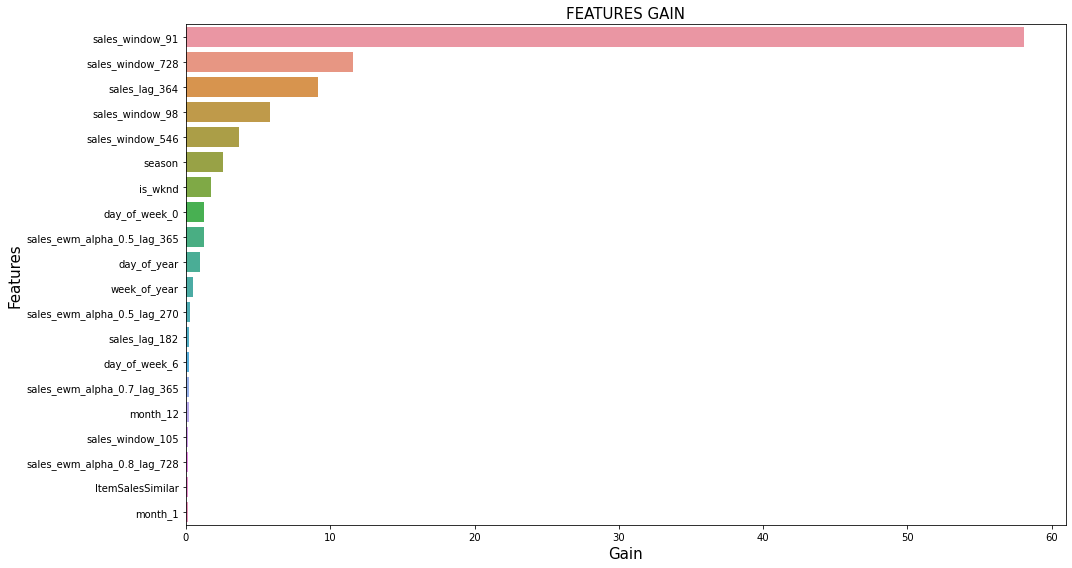

In [103]:
feature_importance = plot_lgb_importance(model,plot = True, nums = 20)

In [104]:
zero_gain = feature_importance[feature_importance["Gain"] == 0]["Feature"].tolist()
zero_gain[:10]

['is_year_end',
 'item_12',
 'item_11',
 'month_6',
 'holidays',
 'month_8',
 'item_9',
 'item_27',
 'store_10',
 'item_8']

In [105]:
########################
# Final Model
########################

In [106]:
new_cols = [col for col in cols if col not in zero_gain]
len(new_cols),len(zero_gain),len(cols)

(122, 43, 165)

In [107]:
final_train = df.loc[~df.sales.isna()]

print("Final Train DataFrame Shape : {}".format(final_train.shape))

Final Train DataFrame Shape : (913000, 168)


In [108]:
final_Y_train = final_train["sales"]
final_X_train = final_train[cols]
final_X_train_new = final_train[new_cols]

print("Final Y Train DataFrame Shape : {}".format(final_Y_train.shape))
print("Final X Train DataFrame Shape : {}".format(final_X_train.shape))
print("Final X Train New DataFrame Shape : {}".format(final_X_train_new.shape))

Final Y Train DataFrame Shape : (913000,)
Final X Train DataFrame Shape : (913000, 165)
Final X Train New DataFrame Shape : (913000, 122)


In [109]:
final_test = df.loc[df.sales.isna()]
final_X_test = final_test[cols]
final_X_test_new = final_test[new_cols]

print("Final X Test DataFrame Shape : {}".format(final_X_test.shape))
print("Final X Test New DataFrame Shape : {}".format(final_X_test_new.shape))

Final X Test DataFrame Shape : (45000, 165)
Final X Test New DataFrame Shape : (45000, 122)


In [110]:
final_lgbtrain = lgb.Dataset(data = final_X_train, label = final_Y_train, feature_name=cols)
final_lgbtrain_new = lgb.Dataset(data = final_X_train_new, label = final_Y_train, feature_name=new_cols)

In [111]:
lgb_params = {"metric" : {"mae"},
              "num_leaves" : 10,
              "learning_rate" :0.02,
              "feature_fraction" : 0.8,
              "max_depth" : 5,
              "verbose" : 0,
              "num_boost_round" : model.best_iteration,
              "nthread" : -1}

In [112]:
best_model = lgb.train(params = lgb_params,
                       train_set=final_lgbtrain,
                       num_boost_round=lgb_params["num_boost_round"])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [113]:
best_model_new = lgb.train(params = lgb_params,
                           train_set=final_lgbtrain_new,
                           num_boost_round=lgb_params["num_boost_round"])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [114]:
final_predictions = best_model.predict(data = final_X_test, num_iteration=best_model.best_iteration)
final_predictions[:10]

array([2.52783052, 2.7089003 , 2.71824946, 2.81717441, 2.87085448,
       2.95837535, 2.99218877, 2.59539272, 2.71499382, 2.67938647])

In [115]:
final_predictions_new = best_model_new.predict(data = final_X_test_new, num_iteration=best_model_new.best_iteration)
final_predictions_new[:10]

array([2.50808853, 2.70496103, 2.70447081, 2.80661371, 2.87925317,
       2.9734454 , 2.9979457 , 2.58654022, 2.70801243, 2.66535933])

In [116]:
#####################################################
# Create submission
#####################################################

In [117]:
test.head()

id       date  store  item
0   0 2018-01-01      1     1
1   1 2018-01-02      1     1
2   2 2018-01-03      1     1
3   3 2018-01-04      1     1
4   4 2018-01-05      1     1

In [118]:
submission_df = test.loc[:,["id"]]
submission_df["sales"] = np.expm1(final_predictions)
submission_df["id"] = submission_df.id.astype(int)
submission_df.to_csv("DemandForecast/submission_demand.csv",index = False)
submission_df.head()

id   sales
0   0 11.5263
1   1 14.0128
2   2 14.1538
3   3 15.7295
4   4 16.6521

In [119]:
#####################################################
#Graphically Comparison Actual And Estimated Values
#####################################################

In [120]:
review_test = pd.concat([test[["date","store","item"]], submission_df["sales"]], axis = 1)
review_test.head()

date  store  item   sales
0 2018-01-01      1     1 11.5263
1 2018-01-02      1     1 14.0128
2 2018-01-03      1     1 14.1538
3 2018-01-04      1     1 15.7295
4 2018-01-05      1     1 16.6521

In [121]:
def final_store_item_sales(train,test,store = 1):
    
    train_groupby = train[train["store"] == store].set_index("date")
    test_groupby = test[test["store"] == store].set_index("date")
    
    plt.figure(figsize = (50,50))
    
    for i in range(1,51):
        
        plt.subplot(10,5,i)
        train_groupby[train_groupby["item"] == i]["sales"].plot(legend = "Actuals")
        test_groupby[test_groupby["item"] == i]["sales"].plot(legend= "Predictions")
        plt.title(f"For Item {i} Sales Distribution")
        plt.legend(loc = "upper left")
    
    plt.tight_layout()
    plt.suptitle(f"For Store {store} Sales Distribution",y = 1.01, x= 0.5, fontsize = 15)
    plt.show()   

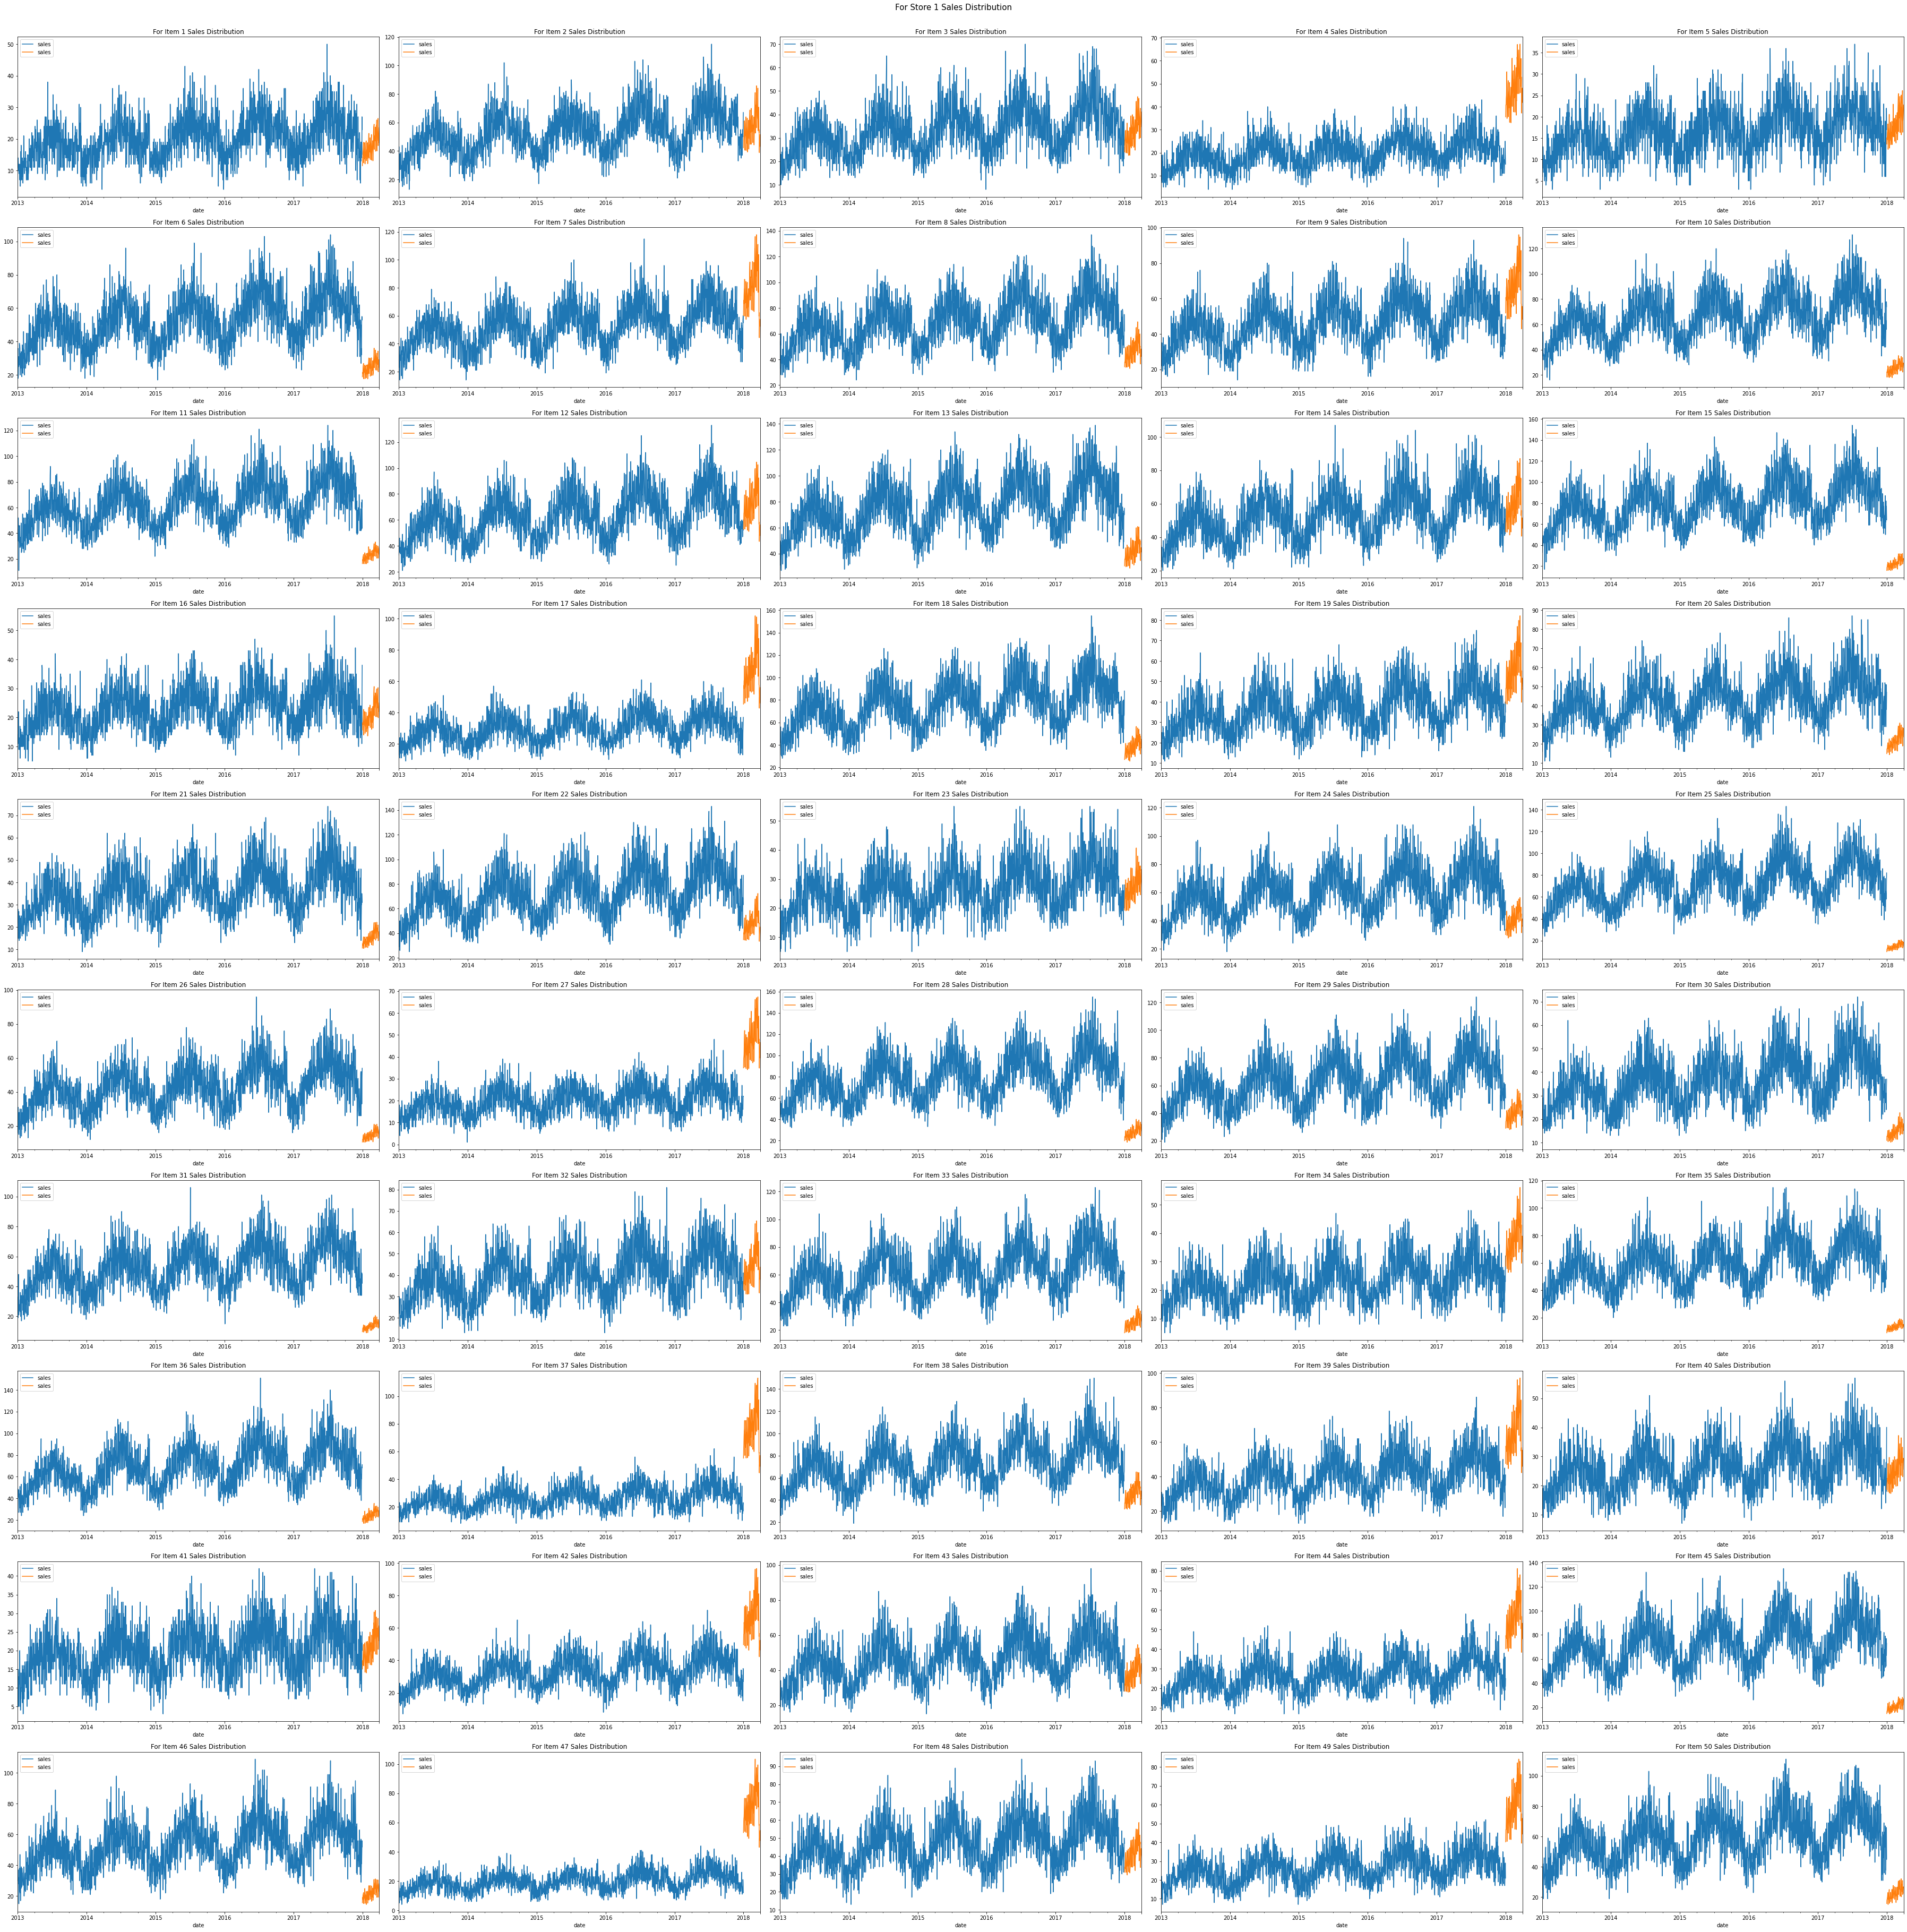

In [122]:
final_store_item_sales(train, review_test, store = 1)

In [123]:
pd.to_pickle(best_model, open("DemandForecast/Final_LGBM.pkl", "wb"))